# РАЗДЕЛ 3. Конструирование признаков

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor, BayesianRidge, ARDRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
%matplotlib inline 
sns.set(style="ticks")

## Попробуем изменить качество и количество признаков и оценить их влияние на точность модели 
    3.1. Удалим из dataset выбросы
    3.2. Переведем в категориальный признак "Угол нашивки, град"
    3.3. Сократим количество признаков, оказывающих наименьшее влияние на модель.

Для сравнительного анализа возьмем теже алгоритмы машинного обучения, что и в разделе 2:
В качестве метрики для оценки моделей возьмём среднюю абсолютную ошибку (mae) 

In [2]:
# объект для хранения оценок различных моделей
# под y1 - закодирован целевой признак "Модуль упругости при растяжении, ГПа"
# под y2 - закодирован целевой признак "Прочность при растяжении, МПа"

modelsMAE_y1=[]
modelsMAE_y2=[]

In [3]:
# Подготовка данных для обучения
path_1 = r'./Data/X.xlsx'
X = pd.read_excel(path_1,index_col=0)
X.head()


,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,220.0,0,4.0,57.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,220.0,0,4.0,60.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,220.0,0,4.0,70.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,220.0,0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,220.0,0,5.0,57.0


In [4]:
path_2 = r'./Data/y.xlsx'
y = pd.read_excel(path_2,index_col=0)
y1 = y.drop(columns='Прочность при растяжении, МПа')
y2 = y.drop(columns='Модуль упругости при растяжении, ГПа')
y2.head()

,"Прочность при растяжении, МПа"
0,3000.0
1,3000.0
2,3000.0
3,3000.0
4,3000.0


## 3.3 Влияние сокращения признаков на качество моделей
Сокращение признаков сделаем на основе значений линейных коэффициентов модели ElasticNet, обозначающих вклад признака в целевой 


In [5]:
#разбиение данных на тестовую и тренировочную часть
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, shuffle=True)

In [6]:
# модель линейной регрессии ElasticNet тренируем на исходных данных
modelElastic = ElasticNet(alpha=0.1, l1_ratio=0.9)
modelElastic.fit(X_train,y_train)

ElasticNet(alpha=0.1, l1_ratio=0.9)

In [7]:
# Коэффициенты линейной регрессии для целевого признака "Модуль упругости при растяжении, ГПа"
i=0
print('Коэффициенты линейной регрессии для целевого признака "Модуль упругости при растяжении, ГПа":')
for name in X.columns:
    print (name, ': ',modelElastic.coef_[0][i])
    i+=1


Коэффициенты линейной регрессии для целевого признака "Модуль упругости при растяжении, ГПа":
Соотношение матрица-наполнитель :  -0.0
Плотность, кг/м3 :  -3.646894690684546e-05
модуль упругости, ГПа :  0.00016926196081745693
Количество отвердителя, м.% :  -0.009275120327223947
Содержание эпоксидных групп,%_2 :  0.05456445463319148
Температура вспышки, С_2 :  0.003642502577694511
Поверхностная плотность, г/м2 :  0.0004190965705929413
Потребление смолы, г/м2 :  0.002421405816226073
Угол нашивки, град :  0.00040007477522492624
Шаг нашивки :  -0.036690717754598604
Плотность нашивки :  0.003086950370085008


### Вывод: В предсказание целевого признака "Модуль упругости при растяжении, ГПа" наименьшее влияние вносят следующие признаки:
    - Соотношение матрица-наполнитель
    - Плотность, кг/м3
    - модуль упругости, ГПа
    - Поверхностная плотность, г/м2
    - Угол нашивки, град
  Попробуем эти признаки удалить и оценить влияние на качество моделей

In [8]:
# Коэффициенты линейной регрессии для целевого признака "Прочность при растяжении, МПа":
i=0
print('Коэффициенты линейной регрессии для целевого признака "Прочность при растяжении, МПа":')
for name in X.columns:
    print (name, ': ',modelElastic.coef_[1][i])
    i+=1

Коэффициенты линейной регрессии для целевого признака "Прочность при растяжении, МПа":
Соотношение матрица-наполнитель :  16.06874413455187
Плотность, кг/м3 :  -0.5720702364097161
модуль упругости, ГПа :  0.05779882530082794
Количество отвердителя, м.% :  -0.9941103727988077
Содержание эпоксидных групп,%_2 :  -0.6727458253232249
Температура вспышки, С_2 :  -0.4465628716167012
Поверхностная плотность, г/м2 :  0.028373639376692465
Потребление смолы, г/м2 :  0.3112844432524833
Угол нашивки, град :  0.02559751133690237
Шаг нашивки :  -9.75185662143342
Плотность нашивки :  1.8297583988622446


### Вывод: В предсказание целевого признака "Прочность при растяжении, МПа" наименьшее влияние вносят следующие признаки:
    - модуль упругости, ГПа
    - Поверхностная плотность, г/м2
    - Угол нашивки, град
Попробуем эти признаки удалить и оценить влияние на качество моделей
Поскольку эти признаки приносят наименьший вклад в оба целевых признака то сформируем датасет без этих трех признаков

In [9]:
X_1 = X[['Соотношение матрица-наполнитель', 'Плотность, кг/м3', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
        'Потребление смолы, г/м2',
        'Шаг нашивки', 'Плотность нашивки']]

In [10]:
# стандартизация  данных
scaler_std = StandardScaler()
scaler_std.fit(X_1)
Xstd = pd.DataFrame (data =scaler_std.transform(X_1), columns=X_1.columns)
scaler_std_y = StandardScaler()
scaler_std_y.fit(y)
ystd = pd.DataFrame (data = scaler_std_y.transform(y), columns=y.columns)

In [11]:
# нормализация  данных
scaler_norm = MinMaxScaler()
scaler_norm.fit(X_1)
Xnorm = pd.DataFrame (data =scaler_norm.transform(X_1), columns=X_1.columns)
scaler_norm_y = MinMaxScaler()
scaler_norm_y.fit(y)
ynorm = pd.DataFrame (data = scaler_norm_y.transform(y), columns=y.columns)

In [12]:
#разбиение  данных на тестовую и тренировочную часть
X_train, X_test, y_train, y_test = train_test_split(X_1,y, test_size=0.2, random_state=42, shuffle=True)
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(Xnorm,ynorm, test_size=0.2, random_state=42, shuffle=True)
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(Xstd,ystd, test_size=0.2, random_state=42, shuffle=True)

In [13]:
# модель линейной регрессии тренируем на исходных данных
modelLinReg = LinearRegression()
modelLinReg.fit(X_train,y_train)
y_pred = modelLinReg.predict(X_test)
MAELinReg_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAELinReg_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
print (MAELinReg_1)
print (MAELinReg_2)

2.4622494603185077
365.27570019312367


In [14]:
# записываем данные об ошибках в итоговую таблицу
modelsMAE_y1.append(['LinearRegression',MAELinReg_1])
modelsMAE_y2.append(['LinearRegression',MAELinReg_2])

In [15]:
# модель линейной регрессии Ridge тренируем на исходных данных
modelRidge = Ridge(alpha=1500.0)
modelRidge.fit(X_train,y_train)
y_pred = modelRidge.predict(X_test)
MAERidge_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAERidge_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
print (MAERidge_1)
print (MAERidge_2)

2.4602077730316383
364.19588015577045


In [16]:
# записываем данные об ошибках в итоговую таблицу
modelsMAE_y1.append(['Ridge',MAERidge_1])
modelsMAE_y2.append(['Ridge',MAERidge_2])

In [17]:
# модель линейной регрессии Ridge тренируем на нормализованных данных
modelRidge = Ridge(alpha=16.0)
modelRidge.fit(X_train_norm,y_train_norm)
print (modelRidge.predict(X_test_norm).shape)
y_pred =  scaler_norm_y.inverse_transform (modelRidge.predict(X_test_norm))
MAERidge_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAERidge_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
print (MAERidge_1)
print (MAERidge_2)

(205, 2)
2.4567905929899005
363.57172163898787


In [18]:
# записываем данные об ошибках в итоговую таблицу
modelsMAE_y1.append(['Ridge_norm',MAERidge_1])
modelsMAE_y2.append(['Ridge_norm',MAERidge_2])

In [19]:
# модель линейной регрессии Ridge тренируем на стандартизованных данных данных
modelRidge = Ridge(alpha=1000)
modelRidge.fit(X_train_std,y_train_std)
y_pred =  scaler_std_y.inverse_transform (modelRidge.predict(X_test_std))
MAERidge_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAERidge_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
print (MAERidge_1)
print (MAERidge_2)

2.456741810424239
363.6479218300614


In [20]:
modelsMAE_y1.append(['Ridge_std',MAERidge_1])
modelsMAE_y2.append(['Ridge_std',MAERidge_2])


In [21]:
# модель линейной регрессии Lasso тренируем на исходных данных
modelLasso = Lasso(alpha=0.1)
modelLasso.fit(X_train,y_train)
y_pred = modelLasso.predict(X_test)
MAELasso_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAELasso_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])

print (MAELasso_1)
print (MAELasso_2)

2.4578997798819544
365.26592664830457


In [22]:
# записываем данные об ошибках в итоговую таблицу
modelsMAE_y1.append(['Lasso',MAELasso_1])
modelsMAE_y2.append(['Lasso',MAELasso_2])

In [23]:
# модель линейной регрессии ElasticNet тренируем на исходных данных
modelElastic = ElasticNet(alpha=0.1, l1_ratio=0.9)
modelElastic.fit(X_train,y_train)
y_pred = modelElastic.predict(X_test)
MAEElastic_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAEElastic_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])

print (MAEElastic_1)
print (MAEElastic_2)

2.457893254219039
365.24609478553845


In [24]:
# записываем данные об ошибках в итоговую таблицу
modelsMAE_y1.append(['ElasticNet',MAEElastic_1])
modelsMAE_y2.append(['ElasticNet',MAEElastic_2])

In [25]:
# модель регрессии BayesianRidge тренируем на исходных данных
modelBay_1=BayesianRidge()
modelBay_1.fit(X_train,y_train.iloc[:,0])
y_pred_1 = modelBay_1.predict(X_test)
MAEBay_1 = mean_absolute_error(y_test.iloc[:,0],y_pred_1)
modelBay_2 = BayesianRidge()
modelBay_2.fit(X_train,y_train.iloc[:,1])
y_pred_2 = modelBay_2.predict(X_test)
MAEBay_2 = mean_absolute_error(y_test.iloc[:,1],y_pred_2)

print (MAEBay_1)
print (MAEBay_2)

2.455433467969294
364.20440330189547


In [26]:
# записываем данные об ошибках в итоговую таблицу
modelsMAE_y1.append(['BayesianRidge',MAEBay_1])
modelsMAE_y2.append(['BayesianRidge',MAEBay_2])

In [27]:
# модель регрессии GradientBoostingRegressor тренируем на исходных данных
modelGBR_1 = GradientBoostingRegressor()
modelGBR_1.fit(X_train,y_train.iloc[:,0])
y_pred_1 = modelGBR_1.predict(X_test)
MAEGBR_1 = mean_absolute_error(y_test.iloc[:,0],y_pred_1)
modelGBR_2 = GradientBoostingRegressor()
modelGBR_2.fit(X_train,y_train.iloc[:,1])
y_pred_2 = modelGBR_2.predict(X_test)
MAEGBR_2 = mean_absolute_error(y_test.iloc[:,1],y_pred_2)

print (MAEGBR_1)
print (MAEGBR_2)

2.5489038569813802
374.0181278739837


In [28]:
# записываем данные об ошибках в итоговую таблицу
modelsMAE_y1.append(['GradientBoostingRegressor',MAEGBR_1])
modelsMAE_y2.append(['GradientBoostingRegressor',MAEGBR_2])

In [29]:
# модель регрессии GradientBoostingRegressor тренируем на нормализованных данных
modelGBR_1 = GradientBoostingRegressor()
modelGBR_1.fit(X_train_norm,y_train_norm.iloc[:,0])
y_pred1 = modelGBR_1.predict(X_test_norm)
modelGBR_2 = GradientBoostingRegressor()
modelGBR_2.fit(X_train_norm,y_train_norm.iloc[:,1])
y_pred2 = modelGBR_2.predict(X_test_norm)
y_pred = np.vstack((y_pred1,y_pred2)).T
y_pred = scaler_norm_y.inverse_transform (y_pred)

MAEGBR_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAEGBR_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
print (MAEGBR_1)
print (MAEGBR_2)

2.553974211493661
375.20582314504156


In [30]:
# записываем данные об ошибках в итоговую таблицу
modelsMAE_y1.append(['GradientBoostingRegressor_norm',MAEGBR_1])
modelsMAE_y2.append(['GradientBoostingRegressor_norm',MAEGBR_2])

In [31]:
# модель регрессии GradientBoostingRegressor тренируем на стандартизованных данных
modelGBR_1 = GradientBoostingRegressor()
modelGBR_1.fit(X_train_std,y_train_std.iloc[:,0])
y_pred1 = modelGBR_1.predict(X_test_std)
modelGBR_2 = GradientBoostingRegressor()
modelGBR_2.fit(X_train_std,y_train_std.iloc[:,1])
y_pred2 = modelGBR_2.predict(X_test_std)
y_pred = np.vstack((y_pred1,y_pred2)).T
y_pred = scaler_std_y.inverse_transform (y_pred)

MAEGBR_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAEGBR_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
print (MAEGBR_1)
print (MAEGBR_2)

2.5452162247608126
374.87969298460797


In [32]:
# записываем данные об ошибках в итоговую таблицу
modelsMAE_y1.append(['GradientBoostingRegressor_std',MAEGBR_1])
modelsMAE_y2.append(['GradientBoostingRegressor_std',MAEGBR_2])

In [33]:
modelsMAE_y1

[['LinearRegression', 2.4622494603185077],
 ['Ridge', 2.4602077730316383],
 ['Ridge_norm', 2.4567905929899005],
 ['Ridge_std', 2.456741810424239],
 ['Lasso', 2.4578997798819544],
 ['ElasticNet', 2.457893254219039],
 ['BayesianRidge', 2.455433467969294],
 ['GradientBoostingRegressor', 2.5489038569813802],
 ['GradientBoostingRegressor_norm', 2.553974211493661],
 ['GradientBoostingRegressor_std', 2.5452162247608126]]

In [34]:
# модель регрессии KNeighborsRegressor тренируем на исходных данных
modelNeihg_1 = KNeighborsRegressor(n_neighbors=13)
modelNeihg_1.fit(X_train,y_train.iloc[:,0])
y_pred_1 = modelNeihg_1.predict(X_test)
MAENeihg_1 = mean_absolute_error(y_test.iloc[:,0],y_pred_1)
modelNeihg_2 = KNeighborsRegressor(n_neighbors=13)
modelNeihg_2.fit(X_train,y_train.iloc[:,1])
y_pred_2 = modelNeihg_2.predict(X_test)
MAENeihg_2 = mean_absolute_error(y_test.iloc[:,1],y_pred_2)
print (MAENeihg_1)
print (MAENeihg_2)

2.5845096019896485
385.55794502372555


In [35]:
# записываем данные об ошибках в итоговую таблицу
modelsMAE_y1.append(['KNeighborsRegressor',MAENeihg_1])
modelsMAE_y2.append(['KNeighborsRegressor',MAENeihg_2])

In [36]:
# модель регрессии KNeighborsRegressor тренируем на нормализованных данных
modelNeihg_1 = KNeighborsRegressor(n_neighbors=13)
modelNeihg_1.fit(X_train_norm, y_train_norm.iloc[:,0])
y_pred1 = modelNeihg_1.predict(X_test_norm)
modelNeihg_2 = KNeighborsRegressor(n_neighbors=13)
modelNeihg_2.fit(X_train_norm,y_train_norm.iloc[:,1])
y_pred2 = modelNeihg_2.predict(X_test_norm)
y_pred = np.vstack((y_pred1,y_pred2)).T
y_pred = scaler_norm_y.inverse_transform (y_pred)

MAENeihg_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAENeihg_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
print (MAENeihg_1)
print (MAENeihg_2)

2.5425995909356165
376.9848187181684


In [37]:
# записываем данные об ошибках в итоговую таблицу
modelsMAE_y1.append(['KNeighborsRegressor_norm',MAENeihg_1])
modelsMAE_y2.append(['KNeighborsRegressor_norm',MAENeihg_2])

In [38]:
# модель регрессии KNeighborsRegressor тренируем на стандартизованных данных
modelNeihg_1 = KNeighborsRegressor(n_neighbors=13)
modelNeihg_1.fit(X_train_std,y_train_std.iloc[:,0])
y_pred1 = modelNeihg_1.predict(X_test_std)
modelNeihg_2 = KNeighborsRegressor(n_neighbors=13)
modelNeihg_2.fit(X_train_norm,y_train_std.iloc[:,1])
y_pred2 = modelNeihg_2.predict(X_test_std)

y_pred = np.vstack((y_pred1,y_pred2)).T
y_pred = scaler_std_y.inverse_transform (y_pred)

MAENeihg_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAENeihg_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
print (MAENeihg_1)
print (MAENeihg_2)

2.535044546975862
369.2115755885344


In [39]:
# записываем данные об ошибках в итоговую таблицу
modelsMAE_y1.append(['KNeighborsRegressor_std',MAENeihg_1])
modelsMAE_y2.append(['KNeighborsRegressor_std',MAENeihg_2])

In [40]:
# модель регрессии DecisionTreeRegressor тренируем на исходных данных
modelTree_1 = DecisionTreeRegressor(max_depth=5)
modelTree_1.fit(X_train,y_train.iloc[:,0])
y_pred_1 = modelTree_1.predict(X_test)
MAETree_1 = mean_absolute_error(y_test.iloc[:,0],y_pred_1)
modelTree_2 = DecisionTreeRegressor(max_depth=5)
modelTree_2.fit(X_train,y_train.iloc[:,1])
y_pred_2 = modelTree_2.predict(X_test)
MAETree_2 = mean_absolute_error(y_test.iloc[:,1],y_pred_2)
print (MAETree_1)
print (MAETree_2)

2.664696544450117
381.1380516267068


In [41]:
# записываем данные об ошибках в итоговую таблицу
modelsMAE_y1.append(['DecisionTreeRegressor',MAETree_1])
modelsMAE_y2.append(['DecisionTreeRegressor',MAETree_2])

In [42]:
# модель регрессии DecisionTreeRegressor тренируем на нормализованных данных
modelTree_1 = DecisionTreeRegressor(max_depth=5)
modelTree_1.fit(X_train_norm,y_train_norm.iloc[:,0])
y_pred1 = modelTree_1.predict(X_test_norm)

modelTree_2 = DecisionTreeRegressor(max_depth=5)
modelTree_2.fit(X_train_norm,y_train_norm.iloc[:,1])
y_pred2 = modelTree_2.predict(X_test_norm)

y_pred = np.vstack((y_pred1,y_pred2)).T
y_pred = scaler_norm_y.inverse_transform (y_pred)

MAETree_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAETree_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
print (MAETree_1)
print (MAETree_2)

2.632245463622306
377.770158143774


In [43]:
# записываем данные об ошибках в итоговую таблицу
modelsMAE_y1.append(['DecisionTreeRegressor_norm',MAETree_1])
modelsMAE_y2.append(['DecisionTreeRegressor_norm',MAETree_2])

In [44]:
# модель регрессии DecisionTreeRegressor тренируем на стандартизованных данных
modelTree_1 = DecisionTreeRegressor(max_depth=5)
modelTree_1.fit(X_train_std,y_train_std.iloc[:,0])
y_pred1 = modelTree_1.predict(X_test_std)

modelTree_2 = DecisionTreeRegressor(max_depth=5)
modelTree_2.fit(X_train_std,y_train_std.iloc[:,1])
y_pred2 = modelTree_2.predict(X_test_std)

y_pred = np.vstack((y_pred1,y_pred2)).T
y_pred = scaler_std_y.inverse_transform (y_pred)

MAETree_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAETree_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
print (MAETree_1)
print (MAETree_2)

2.664696544450115
377.15641197086677


In [45]:
# записываем данные об ошибках в итоговую таблицу
modelsMAE_y1.append(['DecisionTreeRegressor_std',MAETree_1])
modelsMAE_y2.append(['DecisionTreeRegressor_std',MAETree_2])

In [46]:
# модель регрессии RandomForestRegressor тренируем на исходных данных
modelTree_1 = RandomForestRegressor(max_depth=5)
modelTree_1.fit(X_train,y_train.iloc[:,0])
y_pred_1 = modelTree_1.predict(X_test)
MAETree_1 = mean_absolute_error(y_test.iloc[:,0],y_pred_1)
modelTree_2 = RandomForestRegressor(max_depth=5)
modelTree_2.fit(X_train,y_train.iloc[:,1])
y_pred_2 = modelTree_2.predict(X_test)
MAETree_2 = mean_absolute_error(y_test.iloc[:,1],y_pred_2)
print (MAETree_1)
print (MAETree_2)

2.5137449535060026
365.2618847386081


In [47]:
# записываем данные об ошибках в итоговую таблицу
modelsMAE_y1.append(['RandomForestRegressor',MAETree_1])
modelsMAE_y2.append(['RandomForestRegressor',MAETree_2])

In [48]:
# модель регрессии RandomForestRegressor тренируем на нормализованных данных
modelTree_1 = RandomForestRegressor(max_depth=5)
modelTree_1.fit(X_train_norm,y_train_norm.iloc[:,0])
y_pred1 = modelTree_1.predict(X_test_norm)

modelTree_2 = RandomForestRegressor(max_depth=5)
modelTree_2.fit(X_train_norm,y_train_norm.iloc[:,1])
y_pred2 = modelTree_2.predict(X_test_norm)

y_pred = np.vstack((y_pred1,y_pred2)).T
y_pred = scaler_norm_y.inverse_transform (y_pred)

MAETree_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAETree_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
print (MAETree_1)
print (MAETree_2)

2.4876202797335916
368.5012483272103


In [49]:
# записываем данные об ошибках в итоговую таблицу
modelsMAE_y1.append(['RandomForestRegressor_norm',MAETree_1])
modelsMAE_y2.append(['RandomForestRegressor_norm',MAETree_2])

In [50]:
# модель регрессии RandomForestRegressor тренируем на стандартизованных данных
modelTree_1 = RandomForestRegressor(max_depth=5)
modelTree_1.fit(X_train_std,y_train_std.iloc[:,0])
y_pred1 = modelTree_1.predict(X_test_std)

modelTree_2 = RandomForestRegressor(max_depth=5)
modelTree_2.fit(X_train_std,y_train_std.iloc[:,1])
y_pred2 = modelTree_2.predict(X_test_std)

y_pred = np.vstack((y_pred1,y_pred2)).T
y_pred = scaler_std_y.inverse_transform (y_pred)

MAETree_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAETree_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
print (MAETree_1)
print (MAETree_2)

2.507323170841207
363.1016166704064


In [51]:
# записываем данные об ошибках в итоговую таблицу
modelsMAE_y1.append(['RandomForestRegressor_std',MAETree_1])
modelsMAE_y2.append(['RandomForestRegressor_std',MAETree_2])

In [52]:
# модель регрессии AdaBoostRegressor тренируем на исходных данных
modelAda_1 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5), n_estimators=100)
modelAda_1.fit(X_train,y_train.iloc[:,0])
y_pred_1 = modelAda_1.predict(X_test)
MAEAda_1 = mean_absolute_error(y_test.iloc[:,0],y_pred_1)
modelAda_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5), n_estimators=100)
modelAda_2.fit(X_train,y_train.iloc[:,1])
y_pred_2 = modelAda_2.predict(X_test)
MAEAda_2 = mean_absolute_error(y_test.iloc[:,1],y_pred_2)
print (MAEAda_1)
print (MAEAda_2)

2.6228194067491146
389.89831137889365


In [53]:
# записываем данные об ошибках в итоговую таблицу
modelsMAE_y1.append(['AdaBoostRegressor',MAEAda_1])
modelsMAE_y2.append(['AdaBoostRegressor',MAEAda_2])

In [54]:
# модель регрессии AdaBoostRegressor тренируем на нормализованных данных
modelAda_1 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5), n_estimators=100)
modelAda_1.fit(X_train_norm,y_train_norm.iloc[:,0])
y_pred1 = modelAda_1.predict(X_test_norm)

modelAda_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5), n_estimators=100)
modelAda_2.fit(X_train_norm,y_train_norm.iloc[:,1])
y_pred2 = modelAda_2.predict(X_test_norm)

y_pred = np.vstack((y_pred1,y_pred2)).T
y_pred = scaler_norm_y.inverse_transform (y_pred)

MAEAda_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAEAda_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
print (MAEAda_1)
print (MAEAda_2)

2.7026977150963214
391.71053292891054


In [55]:
# записываем данные об ошибках в итоговую таблицу
modelsMAE_y1.append(['AdaBoostRegressor_norm',MAEAda_1])
modelsMAE_y2.append(['AdaBoostRegressor_norm',MAEAda_2])

In [56]:
# модель регрессии AdaBoostRegressor тренируем на стандартизованных данных
modelAda_1 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5), n_estimators=100)
modelAda_1.fit(X_train_std,y_train_std.iloc[:,0])
y_pred1 = modelAda_1.predict(X_test_std)

modelAda_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5), n_estimators=100)
modelAda_2.fit(X_train_std,y_train_std.iloc[:,1])
y_pred2 = modelAda_2.predict(X_test_std)

y_pred = np.vstack((y_pred1,y_pred2)).T
y_pred = scaler_std_y.inverse_transform (y_pred)

MAEAda_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAEAda_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
print (MAEAda_1)
print (MAEAda_2)

2.6074416944120253
389.0154863753897


In [57]:
# записываем данные об ошибках в итоговую таблицу
modelsMAE_y1.append(['AdaBoostRegressor_std',MAEAda_1])
modelsMAE_y2.append(['AdaBoostRegressor_std',MAEAda_2])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 721
Trainable params: 721
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
23/23 - 1s - loss: 5327.6177 - mae: 72.9217 - val_loss: 5215.7598 - val_mae: 72.1593 - 582ms/epoch - 25ms/step
Epoch 2/200
23/23 - 0s - loss: 5222.6772 - mae: 72.1991 - val_loss: 5110.7886 - val_mae: 71.4282 - 50ms/epoch - 2ms/step
Epoch 3/200
23/23 - 0s - loss: 5116.0840 - mae: 71.4571 - val_loss: 5003.4458 

Epoch 62/200
23/23 - 0s - loss: 921.9933 - mae: 30.1999 - val_loss: 877.2109 - val_mae: 29.4688 - 40ms/epoch - 2ms/step
Epoch 63/200
23/23 - 0s - loss: 882.7014 - mae: 29.5425 - val_loss: 839.0107 - val_mae: 28.8134 - 43ms/epoch - 2ms/step
Epoch 64/200
23/23 - 0s - loss: 844.6645 - mae: 28.8918 - val_loss: 802.3354 - val_mae: 28.1698 - 44ms/epoch - 2ms/step
Epoch 65/200
23/23 - 0s - loss: 808.3238 - mae: 28.2558 - val_loss: 767.3625 - val_mae: 27.5420 - 41ms/epoch - 2ms/step
Epoch 66/200
23/23 - 0s - loss: 773.7460 - mae: 27.6361 - val_loss: 734.0856 - val_mae: 26.9312 - 39ms/epoch - 2ms/step
Epoch 67/200
23/23 - 0s - loss: 740.7958 - mae: 27.0346 - val_loss: 702.5264 - val_mae: 26.3387 - 39ms/epoch - 2ms/step
Epoch 68/200
23/23 - 0s - loss: 709.4685 - mae: 26.4489 - val_loss: 672.4161 - val_mae: 25.7608 - 38ms/epoch - 2ms/step
Epoch 69/200
23/23 - 0s - loss: 679.5818 - mae: 25.8768 - val_loss: 643.6221 - val_mae: 25.1957 - 39ms/epoch - 2ms/step
Epoch 70/200
23/23 - 0s - loss: 650.9794

Epoch 131/200
23/23 - 0s - loss: 25.2555 - mae: 4.1989 - val_loss: 20.6493 - val_mae: 3.8365 - 39ms/epoch - 2ms/step
Epoch 132/200
23/23 - 0s - loss: 23.9663 - mae: 4.0671 - val_loss: 19.5331 - val_mae: 3.7190 - 40ms/epoch - 2ms/step
Epoch 133/200
23/23 - 0s - loss: 22.7714 - mae: 3.9458 - val_loss: 18.4997 - val_mae: 3.6046 - 39ms/epoch - 2ms/step
Epoch 134/200
23/23 - 0s - loss: 21.6562 - mae: 3.8275 - val_loss: 17.5644 - val_mae: 3.4994 - 40ms/epoch - 2ms/step
Epoch 135/200
23/23 - 0s - loss: 20.6279 - mae: 3.7207 - val_loss: 16.7162 - val_mae: 3.3991 - 39ms/epoch - 2ms/step
Epoch 136/200
23/23 - 0s - loss: 19.6979 - mae: 3.6234 - val_loss: 15.9106 - val_mae: 3.2987 - 40ms/epoch - 2ms/step
Epoch 137/200
23/23 - 0s - loss: 18.8252 - mae: 3.5289 - val_loss: 15.1807 - val_mae: 3.2078 - 39ms/epoch - 2ms/step
Epoch 138/200
23/23 - 0s - loss: 18.0162 - mae: 3.4429 - val_loss: 14.5285 - val_mae: 3.1301 - 39ms/epoch - 2ms/step
Epoch 139/200
23/23 - 0s - loss: 17.2921 - mae: 3.3629 - val_los

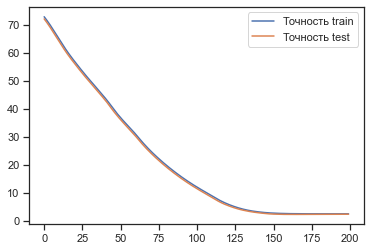

In [58]:
# модель полносвязной нейронной сети для целевого параметра y1 тренируем на исходных данных
modelNN_y1 = Sequential()
modelNN_y1.add(Dense(16,  input_dim=8, activation = 'sigmoid'))
modelNN_y1.add(Dense(32, activation = 'sigmoid'))
modelNN_y1.add(Dense(1, activation = 'linear'))
modelNN_y1.compile(optimizer='adam', loss='mse', metrics=['mae'])
modelNN_y1.summary()
history = modelNN_y1.fit(X_train,y_train.iloc[:,0], 
                    epochs=200, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('MAE')
plt.legend()
plt.show()

In [59]:
y_pred_1 = modelNN_y1.predict(X_test)
MAENN_1 = mean_absolute_error(y_test.iloc[:,0],y_pred_1)
print (MAENN_1)

7/7 [==============================] - 0s 0s/step
2.4607046636632988


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                144       
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 721
Trainable params: 721
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4000
23/23 - 1s - loss: 6302715.0000 - mae: 2462.8909 - val_loss: 6429504.5000 - val_mae: 2481.7417 - 867ms/epoch - 38ms/step
Epoch 2/4000
23/23 - 0s - loss: 6298738.0000 - mae: 2462.0862 - val_loss: 6425485.0000 - val_mae: 2480.9319 - 32ms/epoch - 1ms/step
Epoch 3/4000
23/23 - 0s - loss: 6294702.5000 - mae: 24

Epoch 57/4000
23/23 - 0s - loss: 6074224.5000 - mae: 2416.0623 - val_loss: 6198856.5000 - val_mae: 2434.8293 - 46ms/epoch - 2ms/step
Epoch 58/4000
23/23 - 0s - loss: 6069590.5000 - mae: 2415.1050 - val_loss: 6194251.5000 - val_mae: 2433.8835 - 38ms/epoch - 2ms/step
Epoch 59/4000
23/23 - 0s - loss: 6065066.5000 - mae: 2414.1626 - val_loss: 6189711.0000 - val_mae: 2432.9504 - 40ms/epoch - 2ms/step
Epoch 60/4000
23/23 - 0s - loss: 6060604.5000 - mae: 2413.2405 - val_loss: 6185258.0000 - val_mae: 2432.0354 - 31ms/epoch - 1ms/step
Epoch 61/4000
23/23 - 0s - loss: 6056222.5000 - mae: 2412.3289 - val_loss: 6180852.5000 - val_mae: 2431.1296 - 46ms/epoch - 2ms/step
Epoch 62/4000
23/23 - 0s - loss: 6051884.0000 - mae: 2411.4307 - val_loss: 6176516.5000 - val_mae: 2430.2375 - 31ms/epoch - 1ms/step
Epoch 63/4000
23/23 - 0s - loss: 6047599.5000 - mae: 2410.5442 - val_loss: 6172228.5000 - val_mae: 2429.3552 - 48ms/epoch - 2ms/step
Epoch 64/4000
23/23 - 0s - loss: 6043360.5000 - mae: 2409.6648 - val_

Epoch 119/4000
23/23 - 0s - loss: 5833296.5000 - mae: 2365.6790 - val_loss: 5956534.5000 - val_mae: 2384.5486 - 39ms/epoch - 2ms/step
Epoch 120/4000
23/23 - 0s - loss: 5829672.0000 - mae: 2364.9094 - val_loss: 5952865.5000 - val_mae: 2383.7793 - 38ms/epoch - 2ms/step
Epoch 121/4000
23/23 - 0s - loss: 5826037.5000 - mae: 2364.1409 - val_loss: 5949209.0000 - val_mae: 2383.0120 - 33ms/epoch - 1ms/step
Epoch 122/4000
23/23 - 0s - loss: 5822415.5000 - mae: 2363.3730 - val_loss: 5945546.5000 - val_mae: 2382.2434 - 48ms/epoch - 2ms/step
Epoch 123/4000
23/23 - 0s - loss: 5818784.0000 - mae: 2362.6091 - val_loss: 5941906.0000 - val_mae: 2381.4792 - 39ms/epoch - 2ms/step
Epoch 124/4000
23/23 - 0s - loss: 5815168.0000 - mae: 2361.8420 - val_loss: 5938259.5000 - val_mae: 2380.7136 - 38ms/epoch - 2ms/step
Epoch 125/4000
23/23 - 0s - loss: 5811553.5000 - mae: 2361.0764 - val_loss: 5934612.0000 - val_mae: 2379.9475 - 32ms/epoch - 1ms/step
Epoch 126/4000
23/23 - 0s - loss: 5807939.0000 - mae: 2360.310

Epoch 181/4000
23/23 - 0s - loss: 5612989.5000 - mae: 2318.6421 - val_loss: 5734454.5000 - val_mae: 2337.5183 - 38ms/epoch - 2ms/step
Epoch 182/4000
23/23 - 0s - loss: 5609483.0000 - mae: 2317.8909 - val_loss: 5730959.0000 - val_mae: 2336.7708 - 38ms/epoch - 2ms/step
Epoch 183/4000
23/23 - 0s - loss: 5606005.5000 - mae: 2317.1404 - val_loss: 5727437.5000 - val_mae: 2336.0168 - 33ms/epoch - 1ms/step
Epoch 184/4000
23/23 - 0s - loss: 5602517.5000 - mae: 2316.3862 - val_loss: 5723921.5000 - val_mae: 2335.2644 - 31ms/epoch - 1ms/step
Epoch 185/4000
23/23 - 0s - loss: 5599035.0000 - mae: 2315.6331 - val_loss: 5720401.0000 - val_mae: 2334.5105 - 52ms/epoch - 2ms/step
Epoch 186/4000
23/23 - 0s - loss: 5595544.5000 - mae: 2314.8809 - val_loss: 5716898.5000 - val_mae: 2333.7605 - 37ms/epoch - 2ms/step
Epoch 187/4000
23/23 - 0s - loss: 5592073.5000 - mae: 2314.1265 - val_loss: 5713373.5000 - val_mae: 2333.0049 - 39ms/epoch - 2ms/step
Epoch 188/4000
23/23 - 0s - loss: 5588582.5000 - mae: 2313.376

Epoch 243/4000
23/23 - 0s - loss: 5399363.0000 - mae: 2272.1138 - val_loss: 5519118.0000 - val_mae: 2290.9944 - 38ms/epoch - 2ms/step
Epoch 244/4000
23/23 - 0s - loss: 5395971.5000 - mae: 2271.3640 - val_loss: 5515672.0000 - val_mae: 2290.2424 - 34ms/epoch - 1ms/step
Epoch 245/4000
23/23 - 0s - loss: 5392561.5000 - mae: 2270.6135 - val_loss: 5512246.0000 - val_mae: 2289.4944 - 44ms/epoch - 2ms/step
Epoch 246/4000
23/23 - 0s - loss: 5389163.0000 - mae: 2269.8652 - val_loss: 5508816.5000 - val_mae: 2288.7449 - 32ms/epoch - 1ms/step
Epoch 247/4000
23/23 - 0s - loss: 5385755.0000 - mae: 2269.1187 - val_loss: 5505407.0000 - val_mae: 2288.0005 - 44ms/epoch - 2ms/step
Epoch 248/4000
23/23 - 0s - loss: 5382372.0000 - mae: 2268.3679 - val_loss: 5501964.5000 - val_mae: 2287.2478 - 33ms/epoch - 1ms/step
Epoch 249/4000
23/23 - 0s - loss: 5378964.5000 - mae: 2267.6204 - val_loss: 5498547.0000 - val_mae: 2286.5007 - 31ms/epoch - 1ms/step
Epoch 250/4000
23/23 - 0s - loss: 5375578.0000 - mae: 2266.869

Epoch 305/4000
23/23 - 0s - loss: 5190675.0000 - mae: 2225.7092 - val_loss: 5308646.0000 - val_mae: 2244.5901 - 52ms/epoch - 2ms/step
Epoch 306/4000
23/23 - 0s - loss: 5187338.5000 - mae: 2224.9624 - val_loss: 5305296.5000 - val_mae: 2243.8435 - 25ms/epoch - 1ms/step
Epoch 307/4000
23/23 - 0s - loss: 5184010.5000 - mae: 2224.2161 - val_loss: 5301948.0000 - val_mae: 2243.0977 - 37ms/epoch - 2ms/step
Epoch 308/4000
23/23 - 0s - loss: 5180691.0000 - mae: 2223.4680 - val_loss: 5298587.0000 - val_mae: 2242.3479 - 45ms/epoch - 2ms/step
Epoch 309/4000
23/23 - 0s - loss: 5177359.5000 - mae: 2222.7205 - val_loss: 5295239.5000 - val_mae: 2241.6013 - 40ms/epoch - 2ms/step
Epoch 310/4000
23/23 - 0s - loss: 5174036.0000 - mae: 2221.9741 - val_loss: 5291891.0000 - val_mae: 2240.8545 - 38ms/epoch - 2ms/step
Epoch 311/4000
23/23 - 0s - loss: 5170718.0000 - mae: 2221.2251 - val_loss: 5288533.0000 - val_mae: 2240.1052 - 24ms/epoch - 1ms/step
Epoch 312/4000
23/23 - 0s - loss: 5167392.0000 - mae: 2220.477

Epoch 367/4000
23/23 - 0s - loss: 4986471.5000 - mae: 2179.3591 - val_loss: 5102723.0000 - val_mae: 2198.2405 - 47ms/epoch - 2ms/step
Epoch 368/4000
23/23 - 0s - loss: 4983223.5000 - mae: 2178.6101 - val_loss: 5099428.0000 - val_mae: 2197.4910 - 35ms/epoch - 2ms/step
Epoch 369/4000
23/23 - 0s - loss: 4979965.0000 - mae: 2177.8608 - val_loss: 5096141.5000 - val_mae: 2196.7429 - 47ms/epoch - 2ms/step
Epoch 370/4000
23/23 - 0s - loss: 4976702.5000 - mae: 2177.1167 - val_loss: 5092872.5000 - val_mae: 2195.9988 - 44ms/epoch - 2ms/step
Epoch 371/4000
23/23 - 0s - loss: 4973454.0000 - mae: 2176.3713 - val_loss: 5089590.5000 - val_mae: 2195.2512 - 33ms/epoch - 1ms/step
Epoch 372/4000
23/23 - 0s - loss: 4970201.0000 - mae: 2175.6238 - val_loss: 5086309.5000 - val_mae: 2194.5039 - 52ms/epoch - 2ms/step
Epoch 373/4000
23/23 - 0s - loss: 4966948.0000 - mae: 2174.8755 - val_loss: 5083033.5000 - val_mae: 2193.7576 - 37ms/epoch - 2ms/step
Epoch 374/4000
23/23 - 0s - loss: 4963698.0000 - mae: 2174.130

Epoch 429/4000
23/23 - 0s - loss: 4786673.5000 - mae: 2133.0281 - val_loss: 4901181.5000 - val_mae: 2151.9104 - 39ms/epoch - 2ms/step
Epoch 430/4000
23/23 - 0s - loss: 4783497.5000 - mae: 2132.2800 - val_loss: 4897954.5000 - val_mae: 2151.1609 - 34ms/epoch - 1ms/step
Epoch 431/4000
23/23 - 0s - loss: 4780305.0000 - mae: 2131.5339 - val_loss: 4894744.0000 - val_mae: 2150.4143 - 35ms/epoch - 2ms/step
Epoch 432/4000
23/23 - 0s - loss: 4777121.5000 - mae: 2130.7854 - val_loss: 4891531.5000 - val_mae: 2149.6672 - 46ms/epoch - 2ms/step
Epoch 433/4000
23/23 - 0s - loss: 4773940.0000 - mae: 2130.0396 - val_loss: 4888317.5000 - val_mae: 2148.9197 - 37ms/epoch - 2ms/step
Epoch 434/4000
23/23 - 0s - loss: 4770750.0000 - mae: 2129.2944 - val_loss: 4885121.5000 - val_mae: 2148.1760 - 22ms/epoch - 972us/step
Epoch 435/4000
23/23 - 0s - loss: 4767583.5000 - mae: 2128.5439 - val_loss: 4881896.0000 - val_mae: 2147.4250 - 38ms/epoch - 2ms/step
Epoch 436/4000
23/23 - 0s - loss: 4764398.0000 - mae: 2127.7

Epoch 491/4000
23/23 - 0s - loss: 4591255.0000 - mae: 2086.7161 - val_loss: 4703996.0000 - val_mae: 2105.5959 - 47ms/epoch - 2ms/step
Epoch 492/4000
23/23 - 0s - loss: 4588139.0000 - mae: 2085.9668 - val_loss: 4700845.5000 - val_mae: 2104.8477 - 31ms/epoch - 1ms/step
Epoch 493/4000
23/23 - 0s - loss: 4585015.5000 - mae: 2085.2224 - val_loss: 4697716.5000 - val_mae: 2104.1042 - 46ms/epoch - 2ms/step
Epoch 494/4000
23/23 - 0s - loss: 4581908.0000 - mae: 2084.4758 - val_loss: 4694571.5000 - val_mae: 2103.3567 - 32ms/epoch - 1ms/step
Epoch 495/4000
23/23 - 0s - loss: 4578796.0000 - mae: 2083.7275 - val_loss: 4691427.0000 - val_mae: 2102.6091 - 71ms/epoch - 3ms/step
Epoch 496/4000
23/23 - 0s - loss: 4575683.0000 - mae: 2082.9805 - val_loss: 4688287.0000 - val_mae: 2101.8623 - 57ms/epoch - 2ms/step
Epoch 497/4000
23/23 - 0s - loss: 4572572.0000 - mae: 2082.2339 - val_loss: 4685148.5000 - val_mae: 2101.1155 - 44ms/epoch - 2ms/step
Epoch 498/4000
23/23 - 0s - loss: 4569463.5000 - mae: 2081.487

Epoch 553/4000
23/23 - 0s - loss: 4400193.5000 - mae: 2040.4192 - val_loss: 4511185.0000 - val_mae: 2059.3015 - 43ms/epoch - 2ms/step
Epoch 554/4000
23/23 - 0s - loss: 4397142.5000 - mae: 2039.6761 - val_loss: 4508125.5000 - val_mae: 2058.5586 - 32ms/epoch - 1ms/step
Epoch 555/4000
23/23 - 0s - loss: 4394104.0000 - mae: 2038.9304 - val_loss: 4505051.5000 - val_mae: 2057.8118 - 31ms/epoch - 1ms/step
Epoch 556/4000
23/23 - 0s - loss: 4391067.5000 - mae: 2038.1809 - val_loss: 4501961.5000 - val_mae: 2057.0610 - 48ms/epoch - 2ms/step
Epoch 557/4000
23/23 - 0s - loss: 4388008.5000 - mae: 2037.4363 - val_loss: 4498911.0000 - val_mae: 2056.3193 - 43ms/epoch - 2ms/step
Epoch 558/4000
23/23 - 0s - loss: 4384980.0000 - mae: 2036.6902 - val_loss: 4495832.0000 - val_mae: 2055.5706 - 38ms/epoch - 2ms/step
Epoch 559/4000
23/23 - 0s - loss: 4381934.0000 - mae: 2035.9427 - val_loss: 4492766.5000 - val_mae: 2054.8247 - 26ms/epoch - 1ms/step
Epoch 560/4000
23/23 - 0s - loss: 4378896.5000 - mae: 2035.197

Epoch 615/4000
23/23 - 0s - loss: 4213493.5000 - mae: 1994.1440 - val_loss: 4322735.0000 - val_mae: 2013.0259 - 41ms/epoch - 2ms/step
Epoch 616/4000
23/23 - 0s - loss: 4210518.0000 - mae: 1993.3966 - val_loss: 4319723.0000 - val_mae: 2012.2776 - 65ms/epoch - 3ms/step
Epoch 617/4000
23/23 - 0s - loss: 4207537.5000 - mae: 1992.6506 - val_loss: 4316728.0000 - val_mae: 2011.5336 - 54ms/epoch - 2ms/step
Epoch 618/4000
23/23 - 0s - loss: 4204561.5000 - mae: 1991.9080 - val_loss: 4313741.5000 - val_mae: 2010.7908 - 48ms/epoch - 2ms/step
Epoch 619/4000
23/23 - 0s - loss: 4201599.5000 - mae: 1991.1609 - val_loss: 4310731.5000 - val_mae: 2010.0424 - 38ms/epoch - 2ms/step
Epoch 620/4000
23/23 - 0s - loss: 4198622.5000 - mae: 1990.4158 - val_loss: 4307738.0000 - val_mae: 2009.2972 - 42ms/epoch - 2ms/step
Epoch 621/4000
23/23 - 0s - loss: 4195653.0000 - mae: 1989.6698 - val_loss: 4304740.5000 - val_mae: 2008.5514 - 42ms/epoch - 2ms/step
Epoch 622/4000
23/23 - 0s - loss: 4192688.2500 - mae: 1988.922

Epoch 677/4000
23/23 - 0s - loss: 4031151.2500 - mae: 1947.8920 - val_loss: 4138661.0000 - val_mae: 1966.7738 - 38ms/epoch - 2ms/step
Epoch 678/4000
23/23 - 0s - loss: 4028246.2500 - mae: 1947.1450 - val_loss: 4135722.2500 - val_mae: 1966.0267 - 38ms/epoch - 2ms/step
Epoch 679/4000
23/23 - 0s - loss: 4025344.7500 - mae: 1946.3962 - val_loss: 4132779.7500 - val_mae: 1965.2780 - 40ms/epoch - 2ms/step
Epoch 680/4000
23/23 - 0s - loss: 4022432.0000 - mae: 1945.6533 - val_loss: 4129861.0000 - val_mae: 1964.5354 - 37ms/epoch - 2ms/step
Epoch 681/4000
23/23 - 0s - loss: 4019539.5000 - mae: 1944.9058 - val_loss: 4126922.5000 - val_mae: 1963.7874 - 40ms/epoch - 2ms/step
Epoch 682/4000
23/23 - 0s - loss: 4016634.5000 - mae: 1944.1600 - val_loss: 4123994.5000 - val_mae: 1963.0417 - 39ms/epoch - 2ms/step
Epoch 683/4000
23/23 - 0s - loss: 4013731.7500 - mae: 1943.4146 - val_loss: 4121073.5000 - val_mae: 1962.2976 - 39ms/epoch - 2ms/step
Epoch 684/4000
23/23 - 0s - loss: 4010836.2500 - mae: 1942.669

Epoch 739/4000
23/23 - 0s - loss: 3853160.7500 - mae: 1901.6525 - val_loss: 3958913.2500 - val_mae: 1920.5341 - 40ms/epoch - 2ms/step
Epoch 740/4000
23/23 - 0s - loss: 3850319.7500 - mae: 1900.9067 - val_loss: 3956052.7500 - val_mae: 1919.7893 - 38ms/epoch - 2ms/step
Epoch 741/4000
23/23 - 0s - loss: 3847482.7500 - mae: 1900.1646 - val_loss: 3953201.5000 - val_mae: 1919.0466 - 38ms/epoch - 2ms/step
Epoch 742/4000
23/23 - 0s - loss: 3844659.2500 - mae: 1899.4171 - val_loss: 3950331.0000 - val_mae: 1918.2983 - 39ms/epoch - 2ms/step
Epoch 743/4000
23/23 - 0s - loss: 3841818.5000 - mae: 1898.6722 - val_loss: 3947480.5000 - val_mae: 1917.5554 - 38ms/epoch - 2ms/step
Epoch 744/4000
23/23 - 0s - loss: 3838995.7500 - mae: 1897.9274 - val_loss: 3944612.2500 - val_mae: 1916.8074 - 38ms/epoch - 2ms/step
Epoch 745/4000
23/23 - 0s - loss: 3836163.7500 - mae: 1897.1805 - val_loss: 3941751.5000 - val_mae: 1916.0610 - 37ms/epoch - 2ms/step
Epoch 746/4000
23/23 - 0s - loss: 3833334.5000 - mae: 1896.433

Epoch 801/4000
23/23 - 0s - loss: 3679516.5000 - mae: 1855.4380 - val_loss: 3783537.5000 - val_mae: 1874.3201 - 39ms/epoch - 2ms/step
Epoch 802/4000
23/23 - 0s - loss: 3676751.2500 - mae: 1854.6941 - val_loss: 3780747.7500 - val_mae: 1873.5757 - 39ms/epoch - 2ms/step
Epoch 803/4000
23/23 - 0s - loss: 3673989.5000 - mae: 1853.9493 - val_loss: 3777953.2500 - val_mae: 1872.8298 - 38ms/epoch - 2ms/step
Epoch 804/4000
23/23 - 0s - loss: 3671228.2500 - mae: 1853.2018 - val_loss: 3775157.5000 - val_mae: 1872.0833 - 39ms/epoch - 2ms/step
Epoch 805/4000
23/23 - 0s - loss: 3668470.2500 - mae: 1852.4526 - val_loss: 3772356.0000 - val_mae: 1871.3350 - 39ms/epoch - 2ms/step
Epoch 806/4000
23/23 - 0s - loss: 3665701.2500 - mae: 1851.7089 - val_loss: 3769576.2500 - val_mae: 1870.5920 - 40ms/epoch - 2ms/step
Epoch 807/4000
23/23 - 0s - loss: 3662952.0000 - mae: 1850.9613 - val_loss: 3766772.7500 - val_mae: 1869.8427 - 68ms/epoch - 3ms/step
Epoch 808/4000
23/23 - 0s - loss: 3660179.5000 - mae: 1850.218

Epoch 863/4000
23/23 - 0s - loss: 3510235.2500 - mae: 1809.2439 - val_loss: 3612502.2500 - val_mae: 1828.1248 - 38ms/epoch - 2ms/step
Epoch 864/4000
23/23 - 0s - loss: 3507537.5000 - mae: 1808.4961 - val_loss: 3609777.2500 - val_mae: 1827.3795 - 31ms/epoch - 1ms/step
Epoch 865/4000
23/23 - 0s - loss: 3504844.7500 - mae: 1807.7523 - val_loss: 3607053.2500 - val_mae: 1826.6339 - 47ms/epoch - 2ms/step
Epoch 866/4000
23/23 - 0s - loss: 3502149.2500 - mae: 1807.0087 - val_loss: 3604338.7500 - val_mae: 1825.8906 - 38ms/epoch - 2ms/step
Epoch 867/4000
23/23 - 0s - loss: 3499462.5000 - mae: 1806.2622 - val_loss: 3601612.5000 - val_mae: 1825.1440 - 37ms/epoch - 2ms/step
Epoch 868/4000
23/23 - 0s - loss: 3496768.0000 - mae: 1805.5179 - val_loss: 3598899.5000 - val_mae: 1824.4005 - 38ms/epoch - 2ms/step
Epoch 869/4000
23/23 - 0s - loss: 3494078.2500 - mae: 1804.7756 - val_loss: 3596187.2500 - val_mae: 1823.6572 - 38ms/epoch - 2ms/step
Epoch 870/4000
23/23 - 0s - loss: 3491393.5000 - mae: 1804.029

Epoch 925/4000
23/23 - 0s - loss: 3345286.0000 - mae: 1763.0724 - val_loss: 3445829.0000 - val_mae: 1781.9559 - 38ms/epoch - 2ms/step
Epoch 926/4000
23/23 - 0s - loss: 3342671.2500 - mae: 1762.3276 - val_loss: 3443169.5000 - val_mae: 1781.2096 - 38ms/epoch - 2ms/step
Epoch 927/4000
23/23 - 0s - loss: 3340039.7500 - mae: 1761.5834 - val_loss: 3440527.2500 - val_mae: 1780.4678 - 39ms/epoch - 2ms/step
Epoch 928/4000
23/23 - 0s - loss: 3337426.7500 - mae: 1760.8375 - val_loss: 3437863.7500 - val_mae: 1779.7197 - 38ms/epoch - 2ms/step
Epoch 929/4000
23/23 - 0s - loss: 3334798.0000 - mae: 1760.0941 - val_loss: 3435219.5000 - val_mae: 1778.9766 - 41ms/epoch - 2ms/step
Epoch 930/4000
23/23 - 0s - loss: 3332180.5000 - mae: 1759.3495 - val_loss: 3432569.2500 - val_mae: 1778.2317 - 39ms/epoch - 2ms/step
Epoch 931/4000
23/23 - 0s - loss: 3329562.5000 - mae: 1758.6034 - val_loss: 3429918.7500 - val_mae: 1777.4863 - 38ms/epoch - 2ms/step
Epoch 932/4000
23/23 - 0s - loss: 3326945.0000 - mae: 1757.859

Epoch 987/4000
23/23 - 0s - loss: 3184692.2500 - mae: 1716.9211 - val_loss: 3283476.2500 - val_mae: 1735.8037 - 38ms/epoch - 2ms/step
Epoch 988/4000
23/23 - 0s - loss: 3182133.2500 - mae: 1716.1780 - val_loss: 3280902.2500 - val_mae: 1735.0621 - 38ms/epoch - 2ms/step
Epoch 989/4000
23/23 - 0s - loss: 3179586.7500 - mae: 1715.4340 - val_loss: 3278313.7500 - val_mae: 1734.3159 - 38ms/epoch - 2ms/step
Epoch 990/4000
23/23 - 0s - loss: 3177035.5000 - mae: 1714.6875 - val_loss: 3275725.0000 - val_mae: 1733.5693 - 37ms/epoch - 2ms/step
Epoch 991/4000
23/23 - 0s - loss: 3174478.2500 - mae: 1713.9437 - val_loss: 3273150.5000 - val_mae: 1732.8268 - 37ms/epoch - 2ms/step
Epoch 992/4000
23/23 - 0s - loss: 3171926.0000 - mae: 1713.2014 - val_loss: 3270580.5000 - val_mae: 1732.0850 - 37ms/epoch - 2ms/step
Epoch 993/4000
23/23 - 0s - loss: 3169383.7500 - mae: 1712.4569 - val_loss: 3267997.0000 - val_mae: 1731.3392 - 37ms/epoch - 2ms/step
Epoch 994/4000
23/23 - 0s - loss: 3166835.2500 - mae: 1711.709

Epoch 1048/4000
23/23 - 0s - loss: 3030936.2500 - mae: 1671.5455 - val_loss: 3128009.7500 - val_mae: 1690.4283 - 37ms/epoch - 2ms/step
Epoch 1049/4000
23/23 - 0s - loss: 3028452.7500 - mae: 1670.7998 - val_loss: 3125486.5000 - val_mae: 1689.6818 - 37ms/epoch - 2ms/step
Epoch 1050/4000
23/23 - 0s - loss: 3025963.2500 - mae: 1670.0565 - val_loss: 3122977.2500 - val_mae: 1688.9392 - 39ms/epoch - 2ms/step
Epoch 1051/4000
23/23 - 0s - loss: 3023478.5000 - mae: 1669.3143 - val_loss: 3120471.7500 - val_mae: 1688.1973 - 37ms/epoch - 2ms/step
Epoch 1052/4000
23/23 - 0s - loss: 3021001.7500 - mae: 1668.5686 - val_loss: 3117954.7500 - val_mae: 1687.4517 - 38ms/epoch - 2ms/step
Epoch 1053/4000
23/23 - 0s - loss: 3018517.5000 - mae: 1667.8246 - val_loss: 3115446.7500 - val_mae: 1686.7083 - 38ms/epoch - 2ms/step
Epoch 1054/4000
23/23 - 0s - loss: 3016039.7500 - mae: 1667.0795 - val_loss: 3112933.2500 - val_mae: 1685.9630 - 38ms/epoch - 2ms/step
Epoch 1055/4000
23/23 - 0s - loss: 3013556.2500 - mae: 

Epoch 1109/4000
23/23 - 0s - loss: 2881367.2500 - mae: 1626.1888 - val_loss: 2976726.7500 - val_mae: 1645.0730 - 42ms/epoch - 2ms/step
Epoch 1110/4000
23/23 - 0s - loss: 2878953.7500 - mae: 1625.4457 - val_loss: 2974280.7500 - val_mae: 1644.3292 - 37ms/epoch - 2ms/step
Epoch 1111/4000
23/23 - 0s - loss: 2876541.5000 - mae: 1624.6991 - val_loss: 2971829.2500 - val_mae: 1643.5836 - 38ms/epoch - 2ms/step
Epoch 1112/4000
23/23 - 0s - loss: 2874116.7500 - mae: 1623.9619 - val_loss: 2969403.0000 - val_mae: 1642.8455 - 38ms/epoch - 2ms/step
Epoch 1113/4000
23/23 - 0s - loss: 2871715.5000 - mae: 1623.2158 - val_loss: 2966948.7500 - val_mae: 1642.0983 - 41ms/epoch - 2ms/step
Epoch 1114/4000
23/23 - 0s - loss: 2869290.0000 - mae: 1622.4745 - val_loss: 2964525.7500 - val_mae: 1641.3604 - 49ms/epoch - 2ms/step
Epoch 1115/4000
23/23 - 0s - loss: 2866893.7500 - mae: 1621.7297 - val_loss: 2962068.7500 - val_mae: 1640.6118 - 40ms/epoch - 2ms/step
Epoch 1116/4000
23/23 - 0s - loss: 2864473.7500 - mae: 

Epoch 1170/4000
23/23 - 0s - loss: 2736015.5000 - mae: 1580.8617 - val_loss: 2829647.5000 - val_mae: 1599.7456 - 37ms/epoch - 2ms/step
Epoch 1171/4000
23/23 - 0s - loss: 2733659.7500 - mae: 1580.1202 - val_loss: 2827278.7500 - val_mae: 1599.0051 - 38ms/epoch - 2ms/step
Epoch 1172/4000
23/23 - 0s - loss: 2731309.5000 - mae: 1579.3810 - val_loss: 2824919.5000 - val_mae: 1598.2671 - 38ms/epoch - 2ms/step
Epoch 1173/4000
23/23 - 0s - loss: 2728977.0000 - mae: 1578.6384 - val_loss: 2822531.0000 - val_mae: 1597.5198 - 37ms/epoch - 2ms/step
Epoch 1174/4000
23/23 - 0s - loss: 2726617.0000 - mae: 1577.8979 - val_loss: 2820179.0000 - val_mae: 1596.7834 - 38ms/epoch - 2ms/step
Epoch 1175/4000
23/23 - 0s - loss: 2724289.2500 - mae: 1577.1537 - val_loss: 2817794.7500 - val_mae: 1596.0366 - 38ms/epoch - 2ms/step
Epoch 1176/4000
23/23 - 0s - loss: 2721943.2500 - mae: 1576.4089 - val_loss: 2815418.7500 - val_mae: 1595.2922 - 37ms/epoch - 2ms/step
Epoch 1177/4000
23/23 - 0s - loss: 2719601.2500 - mae: 

Epoch 1231/4000
23/23 - 0s - loss: 2594857.2500 - mae: 1535.5712 - val_loss: 2686788.5000 - val_mae: 1554.4539 - 40ms/epoch - 2ms/step
Epoch 1232/4000
23/23 - 0s - loss: 2592568.7500 - mae: 1534.8298 - val_loss: 2684493.0000 - val_mae: 1553.7152 - 38ms/epoch - 2ms/step
Epoch 1233/4000
23/23 - 0s - loss: 2590298.5000 - mae: 1534.0872 - val_loss: 2682181.2500 - val_mae: 1552.9712 - 37ms/epoch - 2ms/step
Epoch 1234/4000
23/23 - 0s - loss: 2588023.0000 - mae: 1533.3434 - val_loss: 2679866.5000 - val_mae: 1552.2258 - 37ms/epoch - 2ms/step
Epoch 1235/4000
23/23 - 0s - loss: 2585742.2500 - mae: 1532.5989 - val_loss: 2677564.7500 - val_mae: 1551.4841 - 38ms/epoch - 2ms/step
Epoch 1236/4000
23/23 - 0s - loss: 2583463.7500 - mae: 1531.8595 - val_loss: 2675273.5000 - val_mae: 1550.7456 - 37ms/epoch - 2ms/step
Epoch 1237/4000
23/23 - 0s - loss: 2581199.2500 - mae: 1531.1182 - val_loss: 2672962.2500 - val_mae: 1550.0002 - 38ms/epoch - 2ms/step
Epoch 1238/4000
23/23 - 0s - loss: 2578920.5000 - mae: 

Epoch 1292/4000
23/23 - 0s - loss: 2457891.7500 - mae: 1490.3059 - val_loss: 2548118.2500 - val_mae: 1509.1907 - 42ms/epoch - 2ms/step
Epoch 1293/4000
23/23 - 0s - loss: 2455681.2500 - mae: 1489.5630 - val_loss: 2545876.2500 - val_mae: 1508.4478 - 36ms/epoch - 2ms/step
Epoch 1294/4000
23/23 - 0s - loss: 2453464.7500 - mae: 1488.8230 - val_loss: 2543651.5000 - val_mae: 1507.7102 - 31ms/epoch - 1ms/step
Epoch 1295/4000
23/23 - 0s - loss: 2451269.5000 - mae: 1488.0803 - val_loss: 2541398.7500 - val_mae: 1506.9629 - 48ms/epoch - 2ms/step
Epoch 1296/4000
23/23 - 0s - loss: 2449051.7500 - mae: 1487.3394 - val_loss: 2539172.0000 - val_mae: 1506.2239 - 29ms/epoch - 1ms/step
Epoch 1297/4000
23/23 - 0s - loss: 2446850.5000 - mae: 1486.5975 - val_loss: 2536935.5000 - val_mae: 1505.4811 - 48ms/epoch - 2ms/step
Epoch 1298/4000
23/23 - 0s - loss: 2444641.0000 - mae: 1485.8564 - val_loss: 2534710.7500 - val_mae: 1504.7424 - 37ms/epoch - 2ms/step
Epoch 1299/4000
23/23 - 0s - loss: 2442448.7500 - mae: 

Epoch 1353/4000
23/23 - 0s - loss: 2325120.7500 - mae: 1445.0785 - val_loss: 2413644.7500 - val_mae: 1463.9614 - 38ms/epoch - 2ms/step
Epoch 1354/4000
23/23 - 0s - loss: 2322981.5000 - mae: 1444.3324 - val_loss: 2411461.7500 - val_mae: 1463.2157 - 39ms/epoch - 2ms/step
Epoch 1355/4000
23/23 - 0s - loss: 2320835.0000 - mae: 1443.5922 - val_loss: 2409294.5000 - val_mae: 1462.4749 - 37ms/epoch - 2ms/step
Epoch 1356/4000
23/23 - 0s - loss: 2318692.0000 - mae: 1442.8517 - val_loss: 2407136.0000 - val_mae: 1461.7367 - 38ms/epoch - 2ms/step
Epoch 1357/4000
23/23 - 0s - loss: 2316559.2500 - mae: 1442.1106 - val_loss: 2404967.0000 - val_mae: 1460.9946 - 38ms/epoch - 2ms/step
Epoch 1358/4000
23/23 - 0s - loss: 2314424.2500 - mae: 1441.3689 - val_loss: 2402794.0000 - val_mae: 1460.2507 - 38ms/epoch - 2ms/step
Epoch 1359/4000
23/23 - 0s - loss: 2312280.7500 - mae: 1440.6266 - val_loss: 2400641.2500 - val_mae: 1459.5134 - 40ms/epoch - 2ms/step
Epoch 1360/4000
23/23 - 0s - loss: 2310144.0000 - mae: 

Epoch 1414/4000
23/23 - 0s - loss: 2196543.2500 - mae: 1399.9545 - val_loss: 2283351.0000 - val_mae: 1418.7633 - 37ms/epoch - 2ms/step
Epoch 1415/4000
23/23 - 0s - loss: 2194463.7500 - mae: 1399.2148 - val_loss: 2281261.0000 - val_mae: 1418.0266 - 40ms/epoch - 2ms/step
Epoch 1416/4000
23/23 - 0s - loss: 2192402.5000 - mae: 1398.4767 - val_loss: 2279149.0000 - val_mae: 1417.2817 - 38ms/epoch - 2ms/step
Epoch 1417/4000
23/23 - 0s - loss: 2190323.7500 - mae: 1397.7375 - val_loss: 2277056.5000 - val_mae: 1416.5432 - 38ms/epoch - 2ms/step
Epoch 1418/4000
23/23 - 0s - loss: 2188252.2500 - mae: 1397.0038 - val_loss: 2274970.2500 - val_mae: 1415.8066 - 39ms/epoch - 2ms/step
Epoch 1419/4000
23/23 - 0s - loss: 2186190.5000 - mae: 1396.2640 - val_loss: 2272870.5000 - val_mae: 1415.0649 - 36ms/epoch - 2ms/step
Epoch 1420/4000
23/23 - 0s - loss: 2184118.2500 - mae: 1395.5278 - val_loss: 2270783.2500 - val_mae: 1414.3271 - 37ms/epoch - 2ms/step
Epoch 1421/4000
23/23 - 0s - loss: 2182061.2500 - mae: 

Epoch 1475/4000
23/23 - 0s - loss: 2072157.2500 - mae: 1354.9199 - val_loss: 2157266.0000 - val_mae: 1374.5502 - 38ms/epoch - 2ms/step
Epoch 1476/4000
23/23 - 0s - loss: 2070149.8750 - mae: 1354.1858 - val_loss: 2155240.5000 - val_mae: 1373.8306 - 38ms/epoch - 2ms/step
Epoch 1477/4000
23/23 - 0s - loss: 2068155.1250 - mae: 1353.4448 - val_loss: 2153195.7500 - val_mae: 1373.1040 - 38ms/epoch - 2ms/step
Epoch 1478/4000
23/23 - 0s - loss: 2066138.6250 - mae: 1352.7117 - val_loss: 2151184.7500 - val_mae: 1372.3887 - 39ms/epoch - 2ms/step
Epoch 1479/4000
23/23 - 0s - loss: 2064148.1250 - mae: 1351.9723 - val_loss: 2149150.5000 - val_mae: 1371.6650 - 38ms/epoch - 2ms/step
Epoch 1480/4000
23/23 - 0s - loss: 2062144.1250 - mae: 1351.2351 - val_loss: 2147126.7500 - val_mae: 1370.9446 - 38ms/epoch - 2ms/step
Epoch 1481/4000
23/23 - 0s - loss: 2060151.1250 - mae: 1350.4956 - val_loss: 2145090.7500 - val_mae: 1370.2194 - 37ms/epoch - 2ms/step
Epoch 1482/4000
23/23 - 0s - loss: 2058150.7500 - mae: 

Epoch 1536/4000
23/23 - 0s - loss: 1951954.6250 - mae: 1309.9561 - val_loss: 2035357.6250 - val_mae: 1330.5345 - 42ms/epoch - 2ms/step
Epoch 1537/4000
23/23 - 0s - loss: 1950015.6250 - mae: 1309.2184 - val_loss: 2033391.7500 - val_mae: 1329.8124 - 38ms/epoch - 2ms/step
Epoch 1538/4000
23/23 - 0s - loss: 1948075.1250 - mae: 1308.4840 - val_loss: 2031438.6250 - val_mae: 1329.0947 - 38ms/epoch - 2ms/step
Epoch 1539/4000
23/23 - 0s - loss: 1946145.3750 - mae: 1307.7488 - val_loss: 2029476.6250 - val_mae: 1328.3732 - 35ms/epoch - 2ms/step
Epoch 1540/4000
23/23 - 0s - loss: 1944211.8750 - mae: 1307.0170 - val_loss: 2027517.2500 - val_mae: 1327.6525 - 41ms/epoch - 2ms/step
Epoch 1541/4000
23/23 - 0s - loss: 1942284.0000 - mae: 1306.2758 - val_loss: 2025548.8750 - val_mae: 1326.9277 - 35ms/epoch - 2ms/step
Epoch 1542/4000
23/23 - 0s - loss: 1940348.8750 - mae: 1305.5405 - val_loss: 2023592.6250 - val_mae: 1326.2073 - 32ms/epoch - 1ms/step
Epoch 1543/4000
23/23 - 0s - loss: 1938420.1250 - mae: 

Epoch 1597/4000
23/23 - 0s - loss: 1835914.6250 - mae: 1265.1512 - val_loss: 1917623.7500 - val_mae: 1286.5581 - 46ms/epoch - 2ms/step
Epoch 1598/4000
23/23 - 0s - loss: 1834045.3750 - mae: 1264.4196 - val_loss: 1915733.8750 - val_mae: 1285.8396 - 30ms/epoch - 1ms/step
Epoch 1599/4000
23/23 - 0s - loss: 1832180.1250 - mae: 1263.6887 - val_loss: 1913839.7500 - val_mae: 1285.1191 - 46ms/epoch - 2ms/step
Epoch 1600/4000
23/23 - 0s - loss: 1830312.1250 - mae: 1262.9585 - val_loss: 1911952.7500 - val_mae: 1284.4009 - 40ms/epoch - 2ms/step
Epoch 1601/4000
23/23 - 0s - loss: 1828455.6250 - mae: 1262.2229 - val_loss: 1910047.6250 - val_mae: 1283.6752 - 38ms/epoch - 2ms/step
Epoch 1602/4000
23/23 - 0s - loss: 1826589.3750 - mae: 1261.4884 - val_loss: 1908152.7500 - val_mae: 1282.9531 - 38ms/epoch - 2ms/step
Epoch 1603/4000
23/23 - 0s - loss: 1824722.1250 - mae: 1260.7552 - val_loss: 1906270.2500 - val_mae: 1282.2354 - 39ms/epoch - 2ms/step
Epoch 1604/4000
23/23 - 0s - loss: 1822864.3750 - mae: 

Epoch 1658/4000
23/23 - 0s - loss: 1724051.8750 - mae: 1220.4882 - val_loss: 1804064.6250 - val_mae: 1242.6256 - 38ms/epoch - 2ms/step
Epoch 1659/4000
23/23 - 0s - loss: 1722251.5000 - mae: 1219.7581 - val_loss: 1802248.0000 - val_mae: 1241.9098 - 40ms/epoch - 2ms/step
Epoch 1660/4000
23/23 - 0s - loss: 1720463.0000 - mae: 1219.0272 - val_loss: 1800410.8750 - val_mae: 1241.1854 - 38ms/epoch - 2ms/step
Epoch 1661/4000
23/23 - 0s - loss: 1718663.5000 - mae: 1218.2903 - val_loss: 1798583.2500 - val_mae: 1240.4645 - 38ms/epoch - 2ms/step
Epoch 1662/4000
23/23 - 0s - loss: 1716865.3750 - mae: 1217.5605 - val_loss: 1796761.3750 - val_mae: 1239.7455 - 39ms/epoch - 2ms/step
Epoch 1663/4000
23/23 - 0s - loss: 1715069.2500 - mae: 1216.8325 - val_loss: 1794946.0000 - val_mae: 1239.0283 - 43ms/epoch - 2ms/step
Epoch 1664/4000
23/23 - 0s - loss: 1713283.1250 - mae: 1216.0979 - val_loss: 1793114.8750 - val_mae: 1238.3047 - 44ms/epoch - 2ms/step
Epoch 1665/4000
23/23 - 0s - loss: 1711487.1250 - mae: 

Epoch 1719/4000
23/23 - 0s - loss: 1616379.6250 - mae: 1175.9867 - val_loss: 1694684.5000 - val_mae: 1198.7434 - 52ms/epoch - 2ms/step
Epoch 1720/4000
23/23 - 0s - loss: 1614644.5000 - mae: 1175.2521 - val_loss: 1692927.3750 - val_mae: 1198.0249 - 26ms/epoch - 1ms/step
Epoch 1721/4000
23/23 - 0s - loss: 1612914.3750 - mae: 1174.5265 - val_loss: 1691171.5000 - val_mae: 1197.3066 - 47ms/epoch - 2ms/step
Epoch 1722/4000
23/23 - 0s - loss: 1611190.3750 - mae: 1173.7925 - val_loss: 1689407.7500 - val_mae: 1196.5845 - 44ms/epoch - 2ms/step
Epoch 1723/4000
23/23 - 0s - loss: 1609455.0000 - mae: 1173.0663 - val_loss: 1687662.8750 - val_mae: 1195.8699 - 33ms/epoch - 1ms/step
Epoch 1724/4000
23/23 - 0s - loss: 1607737.3750 - mae: 1172.3336 - val_loss: 1685899.7500 - val_mae: 1195.1471 - 31ms/epoch - 1ms/step
Epoch 1725/4000
23/23 - 0s - loss: 1606004.3750 - mae: 1171.6090 - val_loss: 1684155.7500 - val_mae: 1194.4318 - 47ms/epoch - 2ms/step
Epoch 1726/4000
23/23 - 0s - loss: 1604285.6250 - mae: 

Epoch 1780/4000
23/23 - 0s - loss: 1512863.6250 - mae: 1131.5663 - val_loss: 1589463.2500 - val_mae: 1154.9091 - 44ms/epoch - 2ms/step
Epoch 1781/4000
23/23 - 0s - loss: 1511196.3750 - mae: 1130.8370 - val_loss: 1587768.7500 - val_mae: 1154.1892 - 38ms/epoch - 2ms/step
Epoch 1782/4000
23/23 - 0s - loss: 1509525.6250 - mae: 1130.1160 - val_loss: 1586097.3750 - val_mae: 1153.4785 - 39ms/epoch - 2ms/step
Epoch 1783/4000
23/23 - 0s - loss: 1507875.5000 - mae: 1129.3885 - val_loss: 1584403.7500 - val_mae: 1152.7581 - 37ms/epoch - 2ms/step
Epoch 1784/4000
23/23 - 0s - loss: 1506214.7500 - mae: 1128.6656 - val_loss: 1582716.2500 - val_mae: 1152.0397 - 38ms/epoch - 2ms/step
Epoch 1785/4000
23/23 - 0s - loss: 1504558.6250 - mae: 1127.9397 - val_loss: 1581025.2500 - val_mae: 1151.3195 - 39ms/epoch - 2ms/step
Epoch 1786/4000
23/23 - 0s - loss: 1502897.2500 - mae: 1127.2139 - val_loss: 1579345.7500 - val_mae: 1150.6035 - 32ms/epoch - 1ms/step
Epoch 1787/4000
23/23 - 0s - loss: 1501243.8750 - mae: 

Epoch 1841/4000
23/23 - 0s - loss: 1413500.3750 - mae: 1087.5038 - val_loss: 1488414.8750 - val_mae: 1111.1348 - 47ms/epoch - 2ms/step
Epoch 1842/4000
23/23 - 0s - loss: 1411902.7500 - mae: 1086.7828 - val_loss: 1486795.5000 - val_mae: 1110.4187 - 34ms/epoch - 1ms/step
Epoch 1843/4000
23/23 - 0s - loss: 1410310.5000 - mae: 1086.0646 - val_loss: 1485175.7500 - val_mae: 1109.7020 - 42ms/epoch - 2ms/step
Epoch 1844/4000
23/23 - 0s - loss: 1408720.7500 - mae: 1085.3424 - val_loss: 1483551.3750 - val_mae: 1108.9829 - 35ms/epoch - 2ms/step
Epoch 1845/4000
23/23 - 0s - loss: 1407126.2500 - mae: 1084.6268 - val_loss: 1481936.5000 - val_mae: 1108.2675 - 31ms/epoch - 1ms/step
Epoch 1846/4000
23/23 - 0s - loss: 1405541.6250 - mae: 1083.9043 - val_loss: 1480312.3750 - val_mae: 1107.5475 - 48ms/epoch - 2ms/step
Epoch 1847/4000
23/23 - 0s - loss: 1403951.6250 - mae: 1083.1818 - val_loss: 1478692.0000 - val_mae: 1106.8285 - 29ms/epoch - 1ms/step
Epoch 1848/4000
23/23 - 0s - loss: 1402354.3750 - mae: 

Epoch 1902/4000
23/23 - 0s - loss: 1318287.8750 - mae: 1043.9945 - val_loss: 1391512.0000 - val_mae: 1067.4152 - 44ms/epoch - 2ms/step
Epoch 1903/4000
23/23 - 0s - loss: 1316760.3750 - mae: 1043.2872 - val_loss: 1389960.6250 - val_mae: 1066.7002 - 32ms/epoch - 1ms/step
Epoch 1904/4000
23/23 - 0s - loss: 1315236.7500 - mae: 1042.5793 - val_loss: 1388405.5000 - val_mae: 1065.9830 - 32ms/epoch - 1ms/step
Epoch 1905/4000
23/23 - 0s - loss: 1313711.6250 - mae: 1041.8740 - val_loss: 1386854.7500 - val_mae: 1065.2672 - 53ms/epoch - 2ms/step
Epoch 1906/4000
23/23 - 0s - loss: 1312189.6250 - mae: 1041.1625 - val_loss: 1385302.6250 - val_mae: 1064.5504 - 38ms/epoch - 2ms/step
Epoch 1907/4000
23/23 - 0s - loss: 1310666.3750 - mae: 1040.4572 - val_loss: 1383755.6250 - val_mae: 1063.8356 - 33ms/epoch - 1ms/step
Epoch 1908/4000
23/23 - 0s - loss: 1309146.0000 - mae: 1039.7460 - val_loss: 1382208.2500 - val_mae: 1063.1199 - 44ms/epoch - 2ms/step
Epoch 1909/4000
23/23 - 0s - loss: 1307627.0000 - mae: 

Epoch 1963/4000
23/23 - 0s - loss: 1227237.8750 - mae: 1000.9529 - val_loss: 1298781.2500 - val_mae: 1023.7706 - 34ms/epoch - 1ms/step
Epoch 1964/4000
23/23 - 0s - loss: 1225778.8750 - mae: 1000.2554 - val_loss: 1297297.7500 - val_mae: 1023.0568 - 31ms/epoch - 1ms/step
Epoch 1965/4000
23/23 - 0s - loss: 1224322.5000 - mae: 999.5599 - val_loss: 1295813.5000 - val_mae: 1022.3419 - 47ms/epoch - 2ms/step
Epoch 1966/4000
23/23 - 0s - loss: 1222869.2500 - mae: 998.8541 - val_loss: 1294325.1250 - val_mae: 1021.6246 - 43ms/epoch - 2ms/step
Epoch 1967/4000
23/23 - 0s - loss: 1221417.2500 - mae: 998.1523 - val_loss: 1292831.2500 - val_mae: 1020.9042 - 40ms/epoch - 2ms/step
Epoch 1968/4000
23/23 - 0s - loss: 1219955.2500 - mae: 997.4594 - val_loss: 1291357.5000 - val_mae: 1020.1931 - 35ms/epoch - 2ms/step
Epoch 1969/4000
23/23 - 0s - loss: 1218504.2500 - mae: 996.7570 - val_loss: 1289880.8750 - val_mae: 1019.4798 - 31ms/epoch - 1ms/step
Epoch 1970/4000
23/23 - 0s - loss: 1217050.3750 - mae: 996.0

Epoch 2025/4000
23/23 - 0s - loss: 1138936.5000 - mae: 957.8403 - val_loss: 1208753.6250 - val_mae: 979.5637 - 38ms/epoch - 2ms/step
Epoch 2026/4000
23/23 - 0s - loss: 1137540.8750 - mae: 957.1520 - val_loss: 1207350.8750 - val_mae: 978.8747 - 39ms/epoch - 2ms/step
Epoch 2027/4000
23/23 - 0s - loss: 1136162.6250 - mae: 956.4642 - val_loss: 1205925.0000 - val_mae: 978.1738 - 38ms/epoch - 2ms/step
Epoch 2028/4000
23/23 - 0s - loss: 1134765.5000 - mae: 955.7780 - val_loss: 1204524.5000 - val_mae: 977.4849 - 40ms/epoch - 2ms/step
Epoch 2029/4000
23/23 - 0s - loss: 1133389.6250 - mae: 955.0869 - val_loss: 1203100.6250 - val_mae: 976.7839 - 38ms/epoch - 2ms/step
Epoch 2030/4000
23/23 - 0s - loss: 1131998.3750 - mae: 954.3946 - val_loss: 1201690.7500 - val_mae: 976.0894 - 38ms/epoch - 2ms/step
Epoch 2031/4000
23/23 - 0s - loss: 1130611.7500 - mae: 953.7103 - val_loss: 1200289.7500 - val_mae: 975.3984 - 38ms/epoch - 2ms/step
Epoch 2032/4000
23/23 - 0s - loss: 1129238.7500 - mae: 953.0193 - val

Epoch 2087/4000
23/23 - 0s - loss: 1054912.5000 - mae: 915.2294 - val_loss: 1123021.3750 - val_mae: 936.4609 - 44ms/epoch - 2ms/step
Epoch 2088/4000
23/23 - 0s - loss: 1053587.1250 - mae: 914.5453 - val_loss: 1121675.8750 - val_mae: 935.7676 - 37ms/epoch - 2ms/step
Epoch 2089/4000
23/23 - 0s - loss: 1052270.7500 - mae: 913.8563 - val_loss: 1120326.0000 - val_mae: 935.0715 - 40ms/epoch - 2ms/step
Epoch 2090/4000
23/23 - 0s - loss: 1050955.2500 - mae: 913.1744 - val_loss: 1118971.8750 - val_mae: 934.3727 - 36ms/epoch - 2ms/step
Epoch 2091/4000
23/23 - 0s - loss: 1049623.2500 - mae: 912.4888 - val_loss: 1117654.5000 - val_mae: 933.6921 - 32ms/epoch - 1ms/step
Epoch 2092/4000
23/23 - 0s - loss: 1048327.8125 - mae: 911.8047 - val_loss: 1116291.3750 - val_mae: 932.9874 - 47ms/epoch - 2ms/step
Epoch 2093/4000
23/23 - 0s - loss: 1047007.9375 - mae: 911.1232 - val_loss: 1114942.5000 - val_mae: 932.2896 - 38ms/epoch - 2ms/step
Epoch 2094/4000
23/23 - 0s - loss: 1045683.6250 - mae: 910.4374 - val

Epoch 2149/4000
23/23 - 0s - loss: 975157.7500 - mae: 873.0256 - val_loss: 1041572.7500 - val_mae: 893.8046 - 37ms/epoch - 2ms/step
Epoch 2150/4000
23/23 - 0s - loss: 973907.7500 - mae: 872.3495 - val_loss: 1040296.0000 - val_mae: 893.1306 - 38ms/epoch - 2ms/step
Epoch 2151/4000
23/23 - 0s - loss: 972660.0625 - mae: 871.6735 - val_loss: 1039013.4375 - val_mae: 892.4528 - 39ms/epoch - 2ms/step
Epoch 2152/4000
23/23 - 0s - loss: 971406.9375 - mae: 871.0007 - val_loss: 1037739.8125 - val_mae: 891.7792 - 38ms/epoch - 2ms/step
Epoch 2153/4000
23/23 - 0s - loss: 970158.9375 - mae: 870.3242 - val_loss: 1036467.8750 - val_mae: 891.1061 - 39ms/epoch - 2ms/step
Epoch 2154/4000
23/23 - 0s - loss: 968915.9375 - mae: 869.6484 - val_loss: 1035187.0000 - val_mae: 890.4277 - 38ms/epoch - 2ms/step
Epoch 2155/4000
23/23 - 0s - loss: 967662.3750 - mae: 868.9783 - val_loss: 1033925.0000 - val_mae: 889.7585 - 38ms/epoch - 2ms/step
Epoch 2156/4000
23/23 - 0s - loss: 966427.9375 - mae: 868.3018 - val_loss: 1

Epoch 2212/4000
23/23 - 0s - loss: 898470.3750 - mae: 830.9453 - val_loss: 963155.0000 - val_mae: 851.3120 - 39ms/epoch - 2ms/step
Epoch 2213/4000
23/23 - 0s - loss: 897293.3125 - mae: 830.2826 - val_loss: 961935.4375 - val_mae: 850.6326 - 38ms/epoch - 2ms/step
Epoch 2214/4000
23/23 - 0s - loss: 896103.3125 - mae: 829.6227 - val_loss: 960738.1250 - val_mae: 849.9651 - 38ms/epoch - 2ms/step
Epoch 2215/4000
23/23 - 0s - loss: 894929.8125 - mae: 828.9722 - val_loss: 959527.1250 - val_mae: 849.2892 - 38ms/epoch - 2ms/step
Epoch 2216/4000
23/23 - 0s - loss: 893752.0000 - mae: 828.3118 - val_loss: 958315.1250 - val_mae: 848.6124 - 38ms/epoch - 2ms/step
Epoch 2217/4000
23/23 - 0s - loss: 892570.0625 - mae: 827.6600 - val_loss: 957114.1250 - val_mae: 847.9410 - 38ms/epoch - 2ms/step
Epoch 2218/4000
23/23 - 0s - loss: 891398.8750 - mae: 827.0020 - val_loss: 955903.6875 - val_mae: 847.2638 - 38ms/epoch - 2ms/step
Epoch 2219/4000
23/23 - 0s - loss: 890215.5000 - mae: 826.3448 - val_loss: 954712.3

Epoch 2275/4000
23/23 - 0s - loss: 826174.3750 - mae: 790.0348 - val_loss: 889129.8750 - val_mae: 808.9304 - 38ms/epoch - 2ms/step
Epoch 2276/4000
23/23 - 0s - loss: 825060.1875 - mae: 789.3983 - val_loss: 887997.0625 - val_mae: 808.2628 - 39ms/epoch - 2ms/step
Epoch 2277/4000
23/23 - 0s - loss: 823953.7500 - mae: 788.7593 - val_loss: 886853.6875 - val_mae: 807.5882 - 38ms/epoch - 2ms/step
Epoch 2278/4000
23/23 - 0s - loss: 822844.9375 - mae: 788.1110 - val_loss: 885708.1250 - val_mae: 806.9117 - 38ms/epoch - 2ms/step
Epoch 2279/4000
23/23 - 0s - loss: 821733.3125 - mae: 787.4766 - val_loss: 884570.6250 - val_mae: 806.2394 - 37ms/epoch - 2ms/step
Epoch 2280/4000
23/23 - 0s - loss: 820626.0000 - mae: 786.8314 - val_loss: 883433.9375 - val_mae: 805.5669 - 38ms/epoch - 2ms/step
Epoch 2281/4000
23/23 - 0s - loss: 819521.6250 - mae: 786.1823 - val_loss: 882292.7500 - val_mae: 804.8911 - 38ms/epoch - 2ms/step
Epoch 2282/4000
23/23 - 0s - loss: 818406.6875 - mae: 785.5405 - val_loss: 881173.8

Epoch 2338/4000
23/23 - 0s - loss: 758259.1250 - mae: 749.9946 - val_loss: 819486.3125 - val_mae: 767.6313 - 38ms/epoch - 2ms/step
Epoch 2339/4000
23/23 - 0s - loss: 757215.5000 - mae: 749.3607 - val_loss: 818410.9375 - val_mae: 766.9761 - 37ms/epoch - 2ms/step
Epoch 2340/4000
23/23 - 0s - loss: 756173.7500 - mae: 748.7376 - val_loss: 817337.6875 - val_mae: 766.3217 - 39ms/epoch - 2ms/step
Epoch 2341/4000
23/23 - 0s - loss: 755125.1250 - mae: 748.1087 - val_loss: 816284.2500 - val_mae: 765.6785 - 38ms/epoch - 2ms/step
Epoch 2342/4000
23/23 - 0s - loss: 754091.6250 - mae: 747.4799 - val_loss: 815217.4375 - val_mae: 765.0267 - 38ms/epoch - 2ms/step
Epoch 2343/4000
23/23 - 0s - loss: 753059.3750 - mae: 746.8555 - val_loss: 814137.3750 - val_mae: 764.3661 - 38ms/epoch - 2ms/step
Epoch 2344/4000
23/23 - 0s - loss: 752014.2500 - mae: 746.2142 - val_loss: 813075.8125 - val_mae: 763.7162 - 37ms/epoch - 2ms/step
Epoch 2345/4000
23/23 - 0s - loss: 750980.8750 - mae: 745.5907 - val_loss: 812008.7

Epoch 2401/4000
23/23 - 0s - loss: 694704.7500 - mae: 710.8228 - val_loss: 754217.3750 - val_mae: 727.5394 - 38ms/epoch - 2ms/step
Epoch 2402/4000
23/23 - 0s - loss: 693725.8750 - mae: 710.2084 - val_loss: 753216.1875 - val_mae: 726.9071 - 39ms/epoch - 2ms/step
Epoch 2403/4000
23/23 - 0s - loss: 692748.1875 - mae: 709.6008 - val_loss: 752228.3750 - val_mae: 726.2827 - 38ms/epoch - 2ms/step
Epoch 2404/4000
23/23 - 0s - loss: 691787.5000 - mae: 708.9918 - val_loss: 751215.4375 - val_mae: 725.6416 - 37ms/epoch - 2ms/step
Epoch 2405/4000
23/23 - 0s - loss: 690815.3750 - mae: 708.3741 - val_loss: 750208.0625 - val_mae: 725.0034 - 37ms/epoch - 2ms/step
Epoch 2406/4000
23/23 - 0s - loss: 689836.6875 - mae: 707.7655 - val_loss: 749222.8125 - val_mae: 724.3787 - 31ms/epoch - 1ms/step
Epoch 2407/4000
23/23 - 0s - loss: 688876.8125 - mae: 707.1588 - val_loss: 748219.8750 - val_mae: 723.7420 - 31ms/epoch - 1ms/step
Epoch 2408/4000
23/23 - 0s - loss: 687900.8125 - mae: 706.5461 - val_loss: 747239.8

Epoch 2464/4000
23/23 - 0s - loss: 635493.6875 - mae: 673.2607 - val_loss: 693331.6250 - val_mae: 687.8156 - 39ms/epoch - 2ms/step
Epoch 2465/4000
23/23 - 0s - loss: 634608.0625 - mae: 672.6818 - val_loss: 692377.6875 - val_mae: 687.1713 - 39ms/epoch - 2ms/step
Epoch 2466/4000
23/23 - 0s - loss: 633695.3750 - mae: 672.1027 - val_loss: 691447.0000 - val_mae: 686.5418 - 38ms/epoch - 2ms/step
Epoch 2467/4000
23/23 - 0s - loss: 632792.3125 - mae: 671.5182 - val_loss: 690518.7500 - val_mae: 685.9134 - 38ms/epoch - 2ms/step
Epoch 2468/4000
23/23 - 0s - loss: 631886.2500 - mae: 670.9333 - val_loss: 689602.7500 - val_mae: 685.2926 - 38ms/epoch - 2ms/step
Epoch 2469/4000
23/23 - 0s - loss: 630993.8125 - mae: 670.3512 - val_loss: 688668.6875 - val_mae: 684.6588 - 37ms/epoch - 2ms/step
Epoch 2470/4000
23/23 - 0s - loss: 630096.5000 - mae: 669.7584 - val_loss: 687732.0000 - val_mae: 684.0226 - 39ms/epoch - 2ms/step
Epoch 2471/4000
23/23 - 0s - loss: 629195.3125 - mae: 669.1846 - val_loss: 686805.2

Epoch 2527/4000
23/23 - 0s - loss: 580637.5625 - mae: 637.6330 - val_loss: 636717.3750 - val_mae: 648.5212 - 38ms/epoch - 2ms/step
Epoch 2528/4000
23/23 - 0s - loss: 579788.0625 - mae: 637.0912 - val_loss: 635861.3125 - val_mae: 647.9171 - 38ms/epoch - 2ms/step
Epoch 2529/4000
23/23 - 0s - loss: 578947.6250 - mae: 636.5494 - val_loss: 635018.6875 - val_mae: 647.3218 - 38ms/epoch - 2ms/step
Epoch 2530/4000
23/23 - 0s - loss: 578126.5000 - mae: 636.0026 - val_loss: 634145.4375 - val_mae: 646.7041 - 37ms/epoch - 2ms/step
Epoch 2531/4000
23/23 - 0s - loss: 577285.7500 - mae: 635.4515 - val_loss: 633292.1250 - val_mae: 646.0997 - 37ms/epoch - 2ms/step
Epoch 2532/4000
23/23 - 0s - loss: 576459.6250 - mae: 634.9130 - val_loss: 632425.5000 - val_mae: 645.4854 - 37ms/epoch - 2ms/step
Epoch 2533/4000
23/23 - 0s - loss: 575625.6250 - mae: 634.3640 - val_loss: 631568.0000 - val_mae: 644.8766 - 38ms/epoch - 2ms/step
Epoch 2534/4000
23/23 - 0s - loss: 574795.8750 - mae: 633.8226 - val_loss: 630711.2

Epoch 2590/4000
23/23 - 0s - loss: 530054.9375 - mae: 604.1571 - val_loss: 584469.5625 - val_mae: 610.2546 - 37ms/epoch - 2ms/step
Epoch 2591/4000
23/23 - 0s - loss: 529285.8125 - mae: 603.6371 - val_loss: 583675.5000 - val_mae: 609.6494 - 38ms/epoch - 2ms/step
Epoch 2592/4000
23/23 - 0s - loss: 528519.8125 - mae: 603.1277 - val_loss: 582880.7500 - val_mae: 609.0430 - 39ms/epoch - 2ms/step
Epoch 2593/4000
23/23 - 0s - loss: 527753.1875 - mae: 602.6066 - val_loss: 582088.7500 - val_mae: 608.4378 - 37ms/epoch - 2ms/step
Epoch 2594/4000
23/23 - 0s - loss: 526990.0000 - mae: 602.0840 - val_loss: 581293.2500 - val_mae: 607.8291 - 38ms/epoch - 2ms/step
Epoch 2595/4000
23/23 - 0s - loss: 526222.5000 - mae: 601.5592 - val_loss: 580506.9375 - val_mae: 607.2267 - 37ms/epoch - 2ms/step
Epoch 2596/4000
23/23 - 0s - loss: 525465.0625 - mae: 601.0485 - val_loss: 579708.3125 - val_mae: 606.6141 - 38ms/epoch - 2ms/step
Epoch 2597/4000
23/23 - 0s - loss: 524698.0625 - mae: 600.5314 - val_loss: 578924.0

Epoch 2653/4000
23/23 - 0s - loss: 483767.6562 - mae: 572.9617 - val_loss: 536501.7500 - val_mae: 573.5322 - 38ms/epoch - 2ms/step
Epoch 2654/4000
23/23 - 0s - loss: 483070.2188 - mae: 572.4918 - val_loss: 535770.3750 - val_mae: 572.9611 - 38ms/epoch - 2ms/step
Epoch 2655/4000
23/23 - 0s - loss: 482368.7812 - mae: 572.0186 - val_loss: 535045.6875 - val_mae: 572.3945 - 38ms/epoch - 2ms/step
Epoch 2656/4000
23/23 - 0s - loss: 481667.7812 - mae: 571.5549 - val_loss: 534329.9375 - val_mae: 571.8342 - 36ms/epoch - 2ms/step
Epoch 2657/4000
23/23 - 0s - loss: 480977.6875 - mae: 571.0897 - val_loss: 533597.0000 - val_mae: 571.2596 - 40ms/epoch - 2ms/step
Epoch 2658/4000
23/23 - 0s - loss: 480282.0312 - mae: 570.6178 - val_loss: 532865.4375 - val_mae: 570.6852 - 38ms/epoch - 2ms/step
Epoch 2659/4000
23/23 - 0s - loss: 479581.1250 - mae: 570.1378 - val_loss: 532149.8125 - val_mae: 570.1227 - 38ms/epoch - 2ms/step
Epoch 2660/4000
23/23 - 0s - loss: 478888.8125 - mae: 569.6830 - val_loss: 531432.5

Epoch 2716/4000
23/23 - 0s - loss: 441753.5938 - mae: 544.1696 - val_loss: 492824.8750 - val_mae: 540.5054 - 38ms/epoch - 2ms/step
Epoch 2717/4000
23/23 - 0s - loss: 441126.9062 - mae: 543.7478 - val_loss: 492159.5000 - val_mae: 540.0233 - 38ms/epoch - 2ms/step
Epoch 2718/4000
23/23 - 0s - loss: 440489.0312 - mae: 543.3072 - val_loss: 491510.8438 - val_mae: 539.5525 - 37ms/epoch - 2ms/step
Epoch 2719/4000
23/23 - 0s - loss: 439862.2188 - mae: 542.8823 - val_loss: 490854.6250 - val_mae: 539.0756 - 44ms/epoch - 2ms/step
Epoch 2720/4000
23/23 - 0s - loss: 439237.4062 - mae: 542.4409 - val_loss: 490188.5312 - val_mae: 538.5908 - 37ms/epoch - 2ms/step
Epoch 2721/4000
23/23 - 0s - loss: 438610.9688 - mae: 542.0231 - val_loss: 489520.2812 - val_mae: 538.1185 - 37ms/epoch - 2ms/step
Epoch 2722/4000
23/23 - 0s - loss: 437969.8125 - mae: 541.5899 - val_loss: 488886.4375 - val_mae: 537.6722 - 37ms/epoch - 2ms/step
Epoch 2723/4000
23/23 - 0s - loss: 437354.6562 - mae: 541.1710 - val_loss: 488227.1

Epoch 2779/4000
23/23 - 0s - loss: 403968.8125 - mae: 517.7359 - val_loss: 453373.8125 - val_mae: 512.3734 - 41ms/epoch - 2ms/step
Epoch 2780/4000
23/23 - 0s - loss: 403402.8750 - mae: 517.3322 - val_loss: 452780.9688 - val_mae: 511.9503 - 36ms/epoch - 2ms/step
Epoch 2781/4000
23/23 - 0s - loss: 402837.5312 - mae: 516.9214 - val_loss: 452190.3438 - val_mae: 511.5284 - 39ms/epoch - 2ms/step
Epoch 2782/4000
23/23 - 0s - loss: 402274.4375 - mae: 516.5253 - val_loss: 451598.8438 - val_mae: 511.1050 - 38ms/epoch - 2ms/step
Epoch 2783/4000
23/23 - 0s - loss: 401711.7812 - mae: 516.1210 - val_loss: 451008.5312 - val_mae: 510.6817 - 39ms/epoch - 2ms/step
Epoch 2784/4000
23/23 - 0s - loss: 401145.7500 - mae: 515.7219 - val_loss: 450429.0625 - val_mae: 510.2657 - 37ms/epoch - 2ms/step
Epoch 2785/4000
23/23 - 0s - loss: 400587.6562 - mae: 515.3204 - val_loss: 449843.6250 - val_mae: 509.8445 - 37ms/epoch - 2ms/step
Epoch 2786/4000
23/23 - 0s - loss: 400033.4375 - mae: 514.9264 - val_loss: 449246.0

Epoch 2842/4000
23/23 - 0s - loss: 370349.8750 - mae: 493.3331 - val_loss: 418116.7812 - val_mae: 488.4759 - 40ms/epoch - 2ms/step
Epoch 2843/4000
23/23 - 0s - loss: 369851.4375 - mae: 492.9621 - val_loss: 417587.3750 - val_mae: 488.1395 - 35ms/epoch - 2ms/step
Epoch 2844/4000
23/23 - 0s - loss: 369348.2500 - mae: 492.5950 - val_loss: 417071.1250 - val_mae: 487.8269 - 40ms/epoch - 2ms/step
Epoch 2845/4000
23/23 - 0s - loss: 368851.8125 - mae: 492.2264 - val_loss: 416550.5312 - val_mae: 487.5116 - 37ms/epoch - 2ms/step
Epoch 2846/4000
23/23 - 0s - loss: 368360.4375 - mae: 491.8635 - val_loss: 416018.0000 - val_mae: 487.1885 - 38ms/epoch - 2ms/step
Epoch 2847/4000
23/23 - 0s - loss: 367864.2188 - mae: 491.4978 - val_loss: 415488.2812 - val_mae: 486.8665 - 39ms/epoch - 2ms/step
Epoch 2848/4000
23/23 - 0s - loss: 367359.8125 - mae: 491.1266 - val_loss: 414983.1250 - val_mae: 486.5589 - 38ms/epoch - 2ms/step
Epoch 2849/4000
23/23 - 0s - loss: 366876.4375 - mae: 490.7795 - val_loss: 414453.8

Epoch 2905/4000
23/23 - 0s - loss: 340881.9062 - mae: 471.2463 - val_loss: 387025.3125 - val_mae: 470.1425 - 37ms/epoch - 2ms/step
Epoch 2906/4000
23/23 - 0s - loss: 340448.0312 - mae: 470.9226 - val_loss: 386561.8438 - val_mae: 469.8774 - 38ms/epoch - 2ms/step
Epoch 2907/4000
23/23 - 0s - loss: 340011.4688 - mae: 470.5875 - val_loss: 386107.4062 - val_mae: 469.6169 - 38ms/epoch - 2ms/step
Epoch 2908/4000
23/23 - 0s - loss: 339579.9062 - mae: 470.2578 - val_loss: 385653.0625 - val_mae: 469.3560 - 38ms/epoch - 2ms/step
Epoch 2909/4000
23/23 - 0s - loss: 339149.7500 - mae: 469.9371 - val_loss: 385196.9688 - val_mae: 469.0935 - 38ms/epoch - 2ms/step
Epoch 2910/4000
23/23 - 0s - loss: 338717.0625 - mae: 469.5970 - val_loss: 384747.7188 - val_mae: 468.8344 - 38ms/epoch - 2ms/step
Epoch 2911/4000
23/23 - 0s - loss: 338293.1250 - mae: 469.2765 - val_loss: 384286.1250 - val_mae: 468.5677 - 37ms/epoch - 2ms/step
Epoch 2912/4000
23/23 - 0s - loss: 337866.6875 - mae: 468.9504 - val_loss: 383822.5

Epoch 2968/4000
23/23 - 0s - loss: 315482.7812 - mae: 451.7129 - val_loss: 360046.7812 - val_mae: 454.1717 - 38ms/epoch - 2ms/step
Epoch 2969/4000
23/23 - 0s - loss: 315115.0000 - mae: 451.4297 - val_loss: 359656.8750 - val_mae: 453.9490 - 38ms/epoch - 2ms/step
Epoch 2970/4000
23/23 - 0s - loss: 314746.9062 - mae: 451.1443 - val_loss: 359264.1875 - val_mae: 453.7243 - 39ms/epoch - 2ms/step
Epoch 2971/4000
23/23 - 0s - loss: 314388.3438 - mae: 450.8649 - val_loss: 358851.1250 - val_mae: 453.4873 - 38ms/epoch - 2ms/step
Epoch 2972/4000
23/23 - 0s - loss: 314004.5000 - mae: 450.5665 - val_loss: 358476.8438 - val_mae: 453.2722 - 38ms/epoch - 2ms/step
Epoch 2973/4000
23/23 - 0s - loss: 313649.1562 - mae: 450.2808 - val_loss: 358074.2812 - val_mae: 453.0403 - 39ms/epoch - 2ms/step
Epoch 2974/4000
23/23 - 0s - loss: 313279.2812 - mae: 449.9958 - val_loss: 357683.7812 - val_mae: 452.8148 - 38ms/epoch - 2ms/step
Epoch 2975/4000
23/23 - 0s - loss: 312910.9688 - mae: 449.7057 - val_loss: 357303.0

Epoch 3031/4000
23/23 - 0s - loss: 294122.9062 - mae: 435.2217 - val_loss: 337137.0312 - val_mae: 441.1652 - 40ms/epoch - 2ms/step
Epoch 3032/4000
23/23 - 0s - loss: 293816.5312 - mae: 434.9766 - val_loss: 336804.0938 - val_mae: 440.9919 - 40ms/epoch - 2ms/step
Epoch 3033/4000
23/23 - 0s - loss: 293515.4062 - mae: 434.7342 - val_loss: 336461.4375 - val_mae: 440.8133 - 38ms/epoch - 2ms/step
Epoch 3034/4000
23/23 - 0s - loss: 293202.5312 - mae: 434.4881 - val_loss: 336135.6250 - val_mae: 440.6429 - 38ms/epoch - 2ms/step
Epoch 3035/4000
23/23 - 0s - loss: 292900.2500 - mae: 434.2449 - val_loss: 335805.1562 - val_mae: 440.4697 - 26ms/epoch - 1ms/step
Epoch 3036/4000
23/23 - 0s - loss: 292590.0000 - mae: 433.9991 - val_loss: 335492.3750 - val_mae: 440.3054 - 53ms/epoch - 2ms/step
Epoch 3037/4000
23/23 - 0s - loss: 292296.6562 - mae: 433.7591 - val_loss: 335155.3750 - val_mae: 440.1279 - 38ms/epoch - 2ms/step
Epoch 3038/4000
23/23 - 0s - loss: 291993.6250 - mae: 433.5165 - val_loss: 334824.0

Epoch 3094/4000
23/23 - 0s - loss: 276614.7812 - mae: 420.7859 - val_loss: 318105.3750 - val_mae: 430.4492 - 36ms/epoch - 2ms/step
Epoch 3095/4000
23/23 - 0s - loss: 276363.3438 - mae: 420.5771 - val_loss: 317842.7188 - val_mae: 430.2875 - 42ms/epoch - 2ms/step
Epoch 3096/4000
23/23 - 0s - loss: 276122.2500 - mae: 420.3859 - val_loss: 317568.0625 - val_mae: 430.1180 - 38ms/epoch - 2ms/step
Epoch 3097/4000
23/23 - 0s - loss: 275875.1875 - mae: 420.1795 - val_loss: 317297.2500 - val_mae: 429.9503 - 38ms/epoch - 2ms/step
Epoch 3098/4000
23/23 - 0s - loss: 275623.8750 - mae: 419.9662 - val_loss: 317047.0312 - val_mae: 429.7951 - 38ms/epoch - 2ms/step
Epoch 3099/4000
23/23 - 0s - loss: 275388.2500 - mae: 419.7660 - val_loss: 316776.1562 - val_mae: 429.6265 - 39ms/epoch - 2ms/step
Epoch 3100/4000
23/23 - 0s - loss: 275146.7500 - mae: 419.5651 - val_loss: 316505.0312 - val_mae: 429.4572 - 47ms/epoch - 2ms/step
Epoch 3101/4000
23/23 - 0s - loss: 274903.5312 - mae: 419.3626 - val_loss: 316239.7

Epoch 3157/4000
23/23 - 0s - loss: 262845.4688 - mae: 409.0211 - val_loss: 302913.7188 - val_mae: 420.2502 - 36ms/epoch - 2ms/step
Epoch 3158/4000
23/23 - 0s - loss: 262657.0312 - mae: 408.8611 - val_loss: 302702.7188 - val_mae: 420.1071 - 40ms/epoch - 2ms/step
Epoch 3159/4000
23/23 - 0s - loss: 262471.7188 - mae: 408.7067 - val_loss: 302482.2500 - val_mae: 419.9571 - 37ms/epoch - 2ms/step
Epoch 3160/4000
23/23 - 0s - loss: 262281.0312 - mae: 408.5327 - val_loss: 302270.0000 - val_mae: 419.8122 - 31ms/epoch - 1ms/step
Epoch 3161/4000
23/23 - 0s - loss: 262092.5938 - mae: 408.3732 - val_loss: 302063.3438 - val_mae: 419.6707 - 31ms/epoch - 1ms/step
Epoch 3162/4000
23/23 - 0s - loss: 261905.1719 - mae: 408.2172 - val_loss: 301860.3750 - val_mae: 419.5312 - 31ms/epoch - 1ms/step
Epoch 3163/4000
23/23 - 0s - loss: 261726.9531 - mae: 408.0646 - val_loss: 301642.0312 - val_mae: 419.3807 - 31ms/epoch - 1ms/step
Epoch 3164/4000
23/23 - 0s - loss: 261536.5000 - mae: 407.9061 - val_loss: 301441.8

Epoch 3220/4000
23/23 - 0s - loss: 252563.7031 - mae: 400.2127 - val_loss: 291277.7188 - val_mae: 412.2648 - 41ms/epoch - 2ms/step
Epoch 3221/4000
23/23 - 0s - loss: 252430.1719 - mae: 400.0948 - val_loss: 291115.8750 - val_mae: 412.1551 - 47ms/epoch - 2ms/step
Epoch 3222/4000
23/23 - 0s - loss: 252293.1250 - mae: 399.9861 - val_loss: 290957.6562 - val_mae: 412.0475 - 27ms/epoch - 1ms/step
Epoch 3223/4000
23/23 - 0s - loss: 252159.6094 - mae: 399.8600 - val_loss: 290800.0625 - val_mae: 411.9399 - 51ms/epoch - 2ms/step
Epoch 3224/4000
23/23 - 0s - loss: 252024.3281 - mae: 399.7532 - val_loss: 290642.9688 - val_mae: 411.8322 - 40ms/epoch - 2ms/step
Epoch 3225/4000
23/23 - 0s - loss: 251889.1250 - mae: 399.6398 - val_loss: 290491.4688 - val_mae: 411.7280 - 37ms/epoch - 2ms/step
Epoch 3226/4000
23/23 - 0s - loss: 251757.0156 - mae: 399.5264 - val_loss: 290339.6562 - val_mae: 411.6231 - 38ms/epoch - 2ms/step
Epoch 3227/4000
23/23 - 0s - loss: 251626.9062 - mae: 399.4129 - val_loss: 290184.5

Epoch 3283/4000
23/23 - 0s - loss: 245446.2344 - mae: 393.9603 - val_loss: 282912.5000 - val_mae: 406.9007 - 52ms/epoch - 2ms/step
Epoch 3284/4000
23/23 - 0s - loss: 245358.4375 - mae: 393.8902 - val_loss: 282799.2188 - val_mae: 406.8387 - 41ms/epoch - 2ms/step
Epoch 3285/4000
23/23 - 0s - loss: 245262.0469 - mae: 393.7986 - val_loss: 282708.1562 - val_mae: 406.7886 - 42ms/epoch - 2ms/step
Epoch 3286/4000
23/23 - 0s - loss: 245185.1094 - mae: 393.7314 - val_loss: 282587.6875 - val_mae: 406.7220 - 42ms/epoch - 2ms/step
Epoch 3287/4000
23/23 - 0s - loss: 245088.7344 - mae: 393.6469 - val_loss: 282485.6562 - val_mae: 406.6655 - 38ms/epoch - 2ms/step
Epoch 3288/4000
23/23 - 0s - loss: 245000.2969 - mae: 393.5730 - val_loss: 282389.5625 - val_mae: 406.6119 - 51ms/epoch - 2ms/step
Epoch 3289/4000
23/23 - 0s - loss: 244917.9375 - mae: 393.4936 - val_loss: 282282.1250 - val_mae: 406.5518 - 51ms/epoch - 2ms/step
Epoch 3290/4000
23/23 - 0s - loss: 244832.6094 - mae: 393.4236 - val_loss: 282172.0

Epoch 3346/4000
23/23 - 0s - loss: 241008.1250 - mae: 389.7577 - val_loss: 277402.2812 - val_mae: 403.5711 - 47ms/epoch - 2ms/step
Epoch 3347/4000
23/23 - 0s - loss: 240951.1719 - mae: 389.6929 - val_loss: 277343.7812 - val_mae: 403.5367 - 44ms/epoch - 2ms/step
Epoch 3348/4000
23/23 - 0s - loss: 240901.7031 - mae: 389.6461 - val_loss: 277278.4375 - val_mae: 403.4982 - 37ms/epoch - 2ms/step
Epoch 3349/4000
23/23 - 0s - loss: 240853.0625 - mae: 389.5906 - val_loss: 277208.3750 - val_mae: 403.4567 - 27ms/epoch - 1ms/step
Epoch 3350/4000
23/23 - 0s - loss: 240803.5938 - mae: 389.5408 - val_loss: 277137.7500 - val_mae: 403.4146 - 47ms/epoch - 2ms/step
Epoch 3351/4000
23/23 - 0s - loss: 240749.9062 - mae: 389.4780 - val_loss: 277078.9062 - val_mae: 403.3794 - 47ms/epoch - 2ms/step
Epoch 3352/4000
23/23 - 0s - loss: 240703.1094 - mae: 389.4277 - val_loss: 277010.6250 - val_mae: 403.3384 - 37ms/epoch - 2ms/step
Epoch 3353/4000
23/23 - 0s - loss: 240651.3438 - mae: 389.3802 - val_loss: 276951.6

Epoch 3409/4000
23/23 - 0s - loss: 238617.8281 - mae: 387.2854 - val_loss: 274171.8750 - val_mae: 401.4008 - 40ms/epoch - 2ms/step
Epoch 3410/4000
23/23 - 0s - loss: 238595.0625 - mae: 387.2622 - val_loss: 274126.3750 - val_mae: 401.3734 - 40ms/epoch - 2ms/step
Epoch 3411/4000
23/23 - 0s - loss: 238567.4531 - mae: 387.2357 - val_loss: 274088.8750 - val_mae: 401.3507 - 38ms/epoch - 2ms/step
Epoch 3412/4000
23/23 - 0s - loss: 238542.2344 - mae: 387.2094 - val_loss: 274051.2812 - val_mae: 401.3278 - 43ms/epoch - 2ms/step
Epoch 3413/4000
23/23 - 0s - loss: 238518.7656 - mae: 387.1895 - val_loss: 274031.2812 - val_mae: 401.3156 - 38ms/epoch - 2ms/step
Epoch 3414/4000
23/23 - 0s - loss: 238495.3750 - mae: 387.1647 - val_loss: 273986.2812 - val_mae: 401.2879 - 38ms/epoch - 2ms/step
Epoch 3415/4000
23/23 - 0s - loss: 238471.4844 - mae: 387.1424 - val_loss: 273944.4375 - val_mae: 401.2620 - 39ms/epoch - 2ms/step
Epoch 3416/4000
23/23 - 0s - loss: 238443.8438 - mae: 387.1160 - val_loss: 273916.0

Epoch 3472/4000
23/23 - 0s - loss: 237528.9844 - mae: 386.3435 - val_loss: 272456.5000 - val_mae: 400.2216 - 38ms/epoch - 2ms/step
Epoch 3473/4000
23/23 - 0s - loss: 237515.5625 - mae: 386.3351 - val_loss: 272442.8750 - val_mae: 400.2142 - 37ms/epoch - 2ms/step
Epoch 3474/4000
23/23 - 0s - loss: 237505.3281 - mae: 386.3305 - val_loss: 272428.6875 - val_mae: 400.2064 - 37ms/epoch - 2ms/step
Epoch 3475/4000
23/23 - 0s - loss: 237497.5938 - mae: 386.3277 - val_loss: 272404.5312 - val_mae: 400.1931 - 37ms/epoch - 2ms/step
Epoch 3476/4000
23/23 - 0s - loss: 237486.0469 - mae: 386.3178 - val_loss: 272390.9688 - val_mae: 400.1856 - 37ms/epoch - 2ms/step
Epoch 3477/4000
23/23 - 0s - loss: 237476.3281 - mae: 386.3153 - val_loss: 272371.6875 - val_mae: 400.1748 - 37ms/epoch - 2ms/step
Epoch 3478/4000
23/23 - 0s - loss: 237468.2969 - mae: 386.3120 - val_loss: 272349.2812 - val_mae: 400.1623 - 38ms/epoch - 2ms/step
Epoch 3479/4000
23/23 - 0s - loss: 237455.5000 - mae: 386.3030 - val_loss: 272339.5

Epoch 3535/4000
23/23 - 0s - loss: 237100.7031 - mae: 386.1207 - val_loss: 271635.5000 - val_mae: 399.8493 - 27ms/epoch - 1ms/step
Epoch 3536/4000
23/23 - 0s - loss: 237096.3438 - mae: 386.1182 - val_loss: 271622.1562 - val_mae: 399.8446 - 50ms/epoch - 2ms/step
Epoch 3537/4000
23/23 - 0s - loss: 237091.3906 - mae: 386.1163 - val_loss: 271616.0938 - val_mae: 399.8424 - 27ms/epoch - 1ms/step
Epoch 3538/4000
23/23 - 0s - loss: 237088.0156 - mae: 386.1143 - val_loss: 271608.3438 - val_mae: 399.8396 - 46ms/epoch - 2ms/step
Epoch 3539/4000
23/23 - 0s - loss: 237084.5000 - mae: 386.1142 - val_loss: 271598.1875 - val_mae: 399.8359 - 31ms/epoch - 1ms/step
Epoch 3540/4000
23/23 - 0s - loss: 237082.5938 - mae: 386.1099 - val_loss: 271586.7500 - val_mae: 399.8318 - 51ms/epoch - 2ms/step
Epoch 3541/4000
23/23 - 0s - loss: 237077.7344 - mae: 386.1101 - val_loss: 271584.7188 - val_mae: 399.8311 - 38ms/epoch - 2ms/step
Epoch 3542/4000
23/23 - 0s - loss: 237074.1250 - mae: 386.1084 - val_loss: 271572.3

Epoch 3598/4000
23/23 - 0s - loss: 236948.3281 - mae: 386.0433 - val_loss: 271237.2188 - val_mae: 399.6929 - 37ms/epoch - 2ms/step
Epoch 3599/4000
23/23 - 0s - loss: 236947.2656 - mae: 386.0414 - val_loss: 271234.6250 - val_mae: 399.6918 - 35ms/epoch - 2ms/step
Epoch 3600/4000
23/23 - 0s - loss: 236945.5469 - mae: 386.0409 - val_loss: 271228.0625 - val_mae: 399.6911 - 42ms/epoch - 2ms/step
Epoch 3601/4000
23/23 - 0s - loss: 236947.7656 - mae: 386.0448 - val_loss: 271218.0000 - val_mae: 399.6956 - 38ms/epoch - 2ms/step
Epoch 3602/4000
23/23 - 0s - loss: 236942.4375 - mae: 386.0419 - val_loss: 271217.2188 - val_mae: 399.6959 - 37ms/epoch - 2ms/step
Epoch 3603/4000
23/23 - 0s - loss: 236941.2188 - mae: 386.0423 - val_loss: 271213.1875 - val_mae: 399.6977 - 38ms/epoch - 2ms/step
Epoch 3604/4000
23/23 - 0s - loss: 236940.4844 - mae: 386.0419 - val_loss: 271209.0000 - val_mae: 399.6996 - 38ms/epoch - 2ms/step
Epoch 3605/4000
23/23 - 0s - loss: 236939.5000 - mae: 386.0415 - val_loss: 271209.4

Epoch 3661/4000
23/23 - 0s - loss: 236899.5625 - mae: 386.0498 - val_loss: 271045.5625 - val_mae: 399.7770 - 44ms/epoch - 2ms/step
Epoch 3662/4000
23/23 - 0s - loss: 236897.0938 - mae: 386.0488 - val_loss: 271041.8125 - val_mae: 399.7789 - 32ms/epoch - 1ms/step
Epoch 3663/4000
23/23 - 0s - loss: 236900.2656 - mae: 386.0526 - val_loss: 271034.3438 - val_mae: 399.7827 - 45ms/epoch - 2ms/step
Epoch 3664/4000
23/23 - 0s - loss: 236896.1562 - mae: 386.0491 - val_loss: 271037.6250 - val_mae: 399.7810 - 38ms/epoch - 2ms/step
Epoch 3665/4000
23/23 - 0s - loss: 236896.1719 - mae: 386.0489 - val_loss: 271034.8125 - val_mae: 399.7824 - 37ms/epoch - 2ms/step
Epoch 3666/4000
23/23 - 0s - loss: 236896.3281 - mae: 386.0499 - val_loss: 271034.7188 - val_mae: 399.7825 - 37ms/epoch - 2ms/step
Epoch 3667/4000
23/23 - 0s - loss: 236896.2812 - mae: 386.0511 - val_loss: 271030.7500 - val_mae: 399.7845 - 27ms/epoch - 1ms/step
Epoch 3668/4000
23/23 - 0s - loss: 236894.8438 - mae: 386.0493 - val_loss: 271030.4

Epoch 3724/4000
23/23 - 0s - loss: 236882.6719 - mae: 386.0600 - val_loss: 270947.5625 - val_mae: 399.8287 - 53ms/epoch - 2ms/step
Epoch 3725/4000
23/23 - 0s - loss: 236882.5625 - mae: 386.0601 - val_loss: 270949.0625 - val_mae: 399.8279 - 42ms/epoch - 2ms/step
Epoch 3726/4000
23/23 - 0s - loss: 236883.1094 - mae: 386.0605 - val_loss: 270948.2812 - val_mae: 399.8283 - 37ms/epoch - 2ms/step
Epoch 3727/4000
23/23 - 0s - loss: 236882.9844 - mae: 386.0611 - val_loss: 270945.7188 - val_mae: 399.8297 - 37ms/epoch - 2ms/step
Epoch 3728/4000
23/23 - 0s - loss: 236882.5000 - mae: 386.0601 - val_loss: 270946.6250 - val_mae: 399.8292 - 38ms/epoch - 2ms/step
Epoch 3729/4000
23/23 - 0s - loss: 236881.0156 - mae: 386.0596 - val_loss: 270943.6250 - val_mae: 399.8309 - 39ms/epoch - 2ms/step
Epoch 3730/4000
23/23 - 0s - loss: 236880.8750 - mae: 386.0600 - val_loss: 270941.8125 - val_mae: 399.8319 - 38ms/epoch - 2ms/step
Epoch 3731/4000
23/23 - 0s - loss: 236881.7969 - mae: 386.0622 - val_loss: 270938.7

Epoch 3787/4000
23/23 - 0s - loss: 236878.9062 - mae: 386.0755 - val_loss: 270892.2812 - val_mae: 399.8602 - 37ms/epoch - 2ms/step
Epoch 3788/4000
23/23 - 0s - loss: 236876.6719 - mae: 386.0758 - val_loss: 270894.3750 - val_mae: 399.8589 - 36ms/epoch - 2ms/step
Epoch 3789/4000
23/23 - 0s - loss: 236876.4844 - mae: 386.0753 - val_loss: 270894.9375 - val_mae: 399.8587 - 37ms/epoch - 2ms/step
Epoch 3790/4000
23/23 - 0s - loss: 236876.6562 - mae: 386.0752 - val_loss: 270895.0625 - val_mae: 399.8586 - 39ms/epoch - 2ms/step
Epoch 3791/4000
23/23 - 0s - loss: 236876.4531 - mae: 386.0745 - val_loss: 270894.4688 - val_mae: 399.8589 - 37ms/epoch - 2ms/step
Epoch 3792/4000
23/23 - 0s - loss: 236877.1562 - mae: 386.0750 - val_loss: 270892.2812 - val_mae: 399.8602 - 37ms/epoch - 2ms/step
Epoch 3793/4000
23/23 - 0s - loss: 236876.6094 - mae: 386.0764 - val_loss: 270890.8125 - val_mae: 399.8611 - 38ms/epoch - 2ms/step
Epoch 3794/4000
23/23 - 0s - loss: 236876.5156 - mae: 386.0765 - val_loss: 270891.3

Epoch 3850/4000
23/23 - 0s - loss: 236874.9531 - mae: 386.0870 - val_loss: 270868.8438 - val_mae: 399.8741 - 41ms/epoch - 2ms/step
Epoch 3851/4000
23/23 - 0s - loss: 236876.5938 - mae: 386.0892 - val_loss: 270867.7500 - val_mae: 399.8748 - 36ms/epoch - 2ms/step
Epoch 3852/4000
23/23 - 0s - loss: 236876.2656 - mae: 386.0865 - val_loss: 270870.2812 - val_mae: 399.8733 - 32ms/epoch - 1ms/step
Epoch 3853/4000
23/23 - 0s - loss: 236874.6250 - mae: 386.0853 - val_loss: 270867.6250 - val_mae: 399.8749 - 47ms/epoch - 2ms/step
Epoch 3854/4000
23/23 - 0s - loss: 236877.5625 - mae: 386.0913 - val_loss: 270863.6562 - val_mae: 399.8773 - 38ms/epoch - 2ms/step
Epoch 3855/4000
23/23 - 0s - loss: 236875.6562 - mae: 386.0901 - val_loss: 270865.0312 - val_mae: 399.8765 - 38ms/epoch - 2ms/step
Epoch 3856/4000
23/23 - 0s - loss: 236874.6562 - mae: 386.0873 - val_loss: 270865.9688 - val_mae: 399.8759 - 31ms/epoch - 1ms/step
Epoch 3857/4000
23/23 - 0s - loss: 236875.2188 - mae: 386.0876 - val_loss: 270866.8

Epoch 3913/4000
23/23 - 0s - loss: 236875.1250 - mae: 386.0951 - val_loss: 270854.4375 - val_mae: 399.8830 - 38ms/epoch - 2ms/step
Epoch 3914/4000
23/23 - 0s - loss: 236875.2344 - mae: 386.0953 - val_loss: 270854.2500 - val_mae: 399.8831 - 38ms/epoch - 2ms/step
Epoch 3915/4000
23/23 - 0s - loss: 236874.7031 - mae: 386.0945 - val_loss: 270853.9062 - val_mae: 399.8833 - 36ms/epoch - 2ms/step
Epoch 3916/4000
23/23 - 0s - loss: 236877.9062 - mae: 386.0997 - val_loss: 270849.3750 - val_mae: 399.8860 - 38ms/epoch - 2ms/step
Epoch 3917/4000
23/23 - 0s - loss: 236874.6250 - mae: 386.0970 - val_loss: 270850.5000 - val_mae: 399.8854 - 35ms/epoch - 2ms/step
Epoch 3918/4000
23/23 - 0s - loss: 236876.1562 - mae: 386.0972 - val_loss: 270848.7812 - val_mae: 399.8865 - 31ms/epoch - 1ms/step
Epoch 3919/4000
23/23 - 0s - loss: 236874.9375 - mae: 386.0969 - val_loss: 270852.3750 - val_mae: 399.8842 - 49ms/epoch - 2ms/step
Epoch 3920/4000
23/23 - 0s - loss: 236874.2969 - mae: 386.0960 - val_loss: 270851.5

Epoch 3976/4000
23/23 - 0s - loss: 236874.6719 - mae: 386.1001 - val_loss: 270844.6250 - val_mae: 399.8890 - 38ms/epoch - 2ms/step
Epoch 3977/4000
23/23 - 0s - loss: 236876.0000 - mae: 386.1006 - val_loss: 270846.3438 - val_mae: 399.8880 - 38ms/epoch - 2ms/step
Epoch 3978/4000
23/23 - 0s - loss: 236874.1562 - mae: 386.0988 - val_loss: 270843.9688 - val_mae: 399.8895 - 38ms/epoch - 2ms/step
Epoch 3979/4000
23/23 - 0s - loss: 236874.2812 - mae: 386.1003 - val_loss: 270843.1875 - val_mae: 399.8899 - 38ms/epoch - 2ms/step
Epoch 3980/4000
23/23 - 0s - loss: 236874.7344 - mae: 386.0996 - val_loss: 270845.0625 - val_mae: 399.8888 - 37ms/epoch - 2ms/step
Epoch 3981/4000
23/23 - 0s - loss: 236875.9375 - mae: 386.1017 - val_loss: 270841.9062 - val_mae: 399.8908 - 39ms/epoch - 2ms/step
Epoch 3982/4000
23/23 - 0s - loss: 236874.3906 - mae: 386.1016 - val_loss: 270843.0000 - val_mae: 399.8900 - 38ms/epoch - 2ms/step
Epoch 3983/4000
23/23 - 0s - loss: 236875.2344 - mae: 386.1002 - val_loss: 270844.5

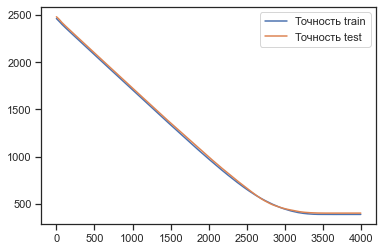

In [60]:
# модель полносвязной нейронной сети для целевого параметра y2 тренируем на исходных данных
modelNN_y2 = Sequential()
modelNN_y2.add(Dense(16,  input_dim=8, activation = 'sigmoid'))
modelNN_y2.add(Dense(32, activation = 'sigmoid'))
modelNN_y2.add(Dense(1, activation = 'linear'))
modelNN_y2.compile(optimizer='adam', loss='mse', metrics=['mae'])
modelNN_y2.summary()
history = modelNN_y2.fit(X_train,y_train.iloc[:,1], 
                    epochs=4000, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('MAE')
plt.legend()
plt.show()

In [61]:
y_pred_2 = modelNN_y2.predict(X_test)
MAENN_2 = mean_absolute_error(y_test.iloc[:,1],y_pred_2)
print (MAENN_2)

7/7 [==============================] - 0s 831us/step
364.2385161935332


In [62]:
# записываем данные об ошибках в итоговую таблицу
modelsMAE_y1.append(['NeuralNetwork',MAENN_1])
modelsMAE_y2.append(['NeuralNetwork',MAENN_2])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                144       
                                                                 
 dense_7 (Dense)             (None, 32)                544       
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 721
Trainable params: 721
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
23/23 - 0s - loss: 0.3909 - mae: 0.5715 - val_loss: 0.0762 - val_mae: 0.2376 - 479ms/epoch - 21ms/step
Epoch 2/120
23/23 - 0s - loss: 0.0410 - mae: 0.1613 - val_loss: 0.0302 - val_mae: 0.1418 - 38ms/epoch - 2ms/step
Epoch 3/120
23/23 - 0s - loss: 0.0307 - mae: 0.1412 - val_loss: 0.0270 - val_mae: 0.1328 - 3

Epoch 66/120
23/23 - 0s - loss: 0.0286 - mae: 0.1357 - val_loss: 0.0254 - val_mae: 0.1273 - 37ms/epoch - 2ms/step
Epoch 67/120
23/23 - 0s - loss: 0.0293 - mae: 0.1375 - val_loss: 0.0263 - val_mae: 0.1306 - 39ms/epoch - 2ms/step
Epoch 68/120
23/23 - 0s - loss: 0.0285 - mae: 0.1356 - val_loss: 0.0254 - val_mae: 0.1272 - 36ms/epoch - 2ms/step
Epoch 69/120
23/23 - 0s - loss: 0.0285 - mae: 0.1358 - val_loss: 0.0252 - val_mae: 0.1257 - 31ms/epoch - 1ms/step
Epoch 70/120
23/23 - 0s - loss: 0.0286 - mae: 0.1359 - val_loss: 0.0253 - val_mae: 0.1267 - 50ms/epoch - 2ms/step
Epoch 71/120
23/23 - 0s - loss: 0.0285 - mae: 0.1358 - val_loss: 0.0251 - val_mae: 0.1254 - 38ms/epoch - 2ms/step
Epoch 72/120
23/23 - 0s - loss: 0.0285 - mae: 0.1362 - val_loss: 0.0262 - val_mae: 0.1301 - 39ms/epoch - 2ms/step
Epoch 73/120
23/23 - 0s - loss: 0.0284 - mae: 0.1356 - val_loss: 0.0254 - val_mae: 0.1272 - 38ms/epoch - 2ms/step
Epoch 74/120
23/23 - 0s - loss: 0.0284 - mae: 0.1357 - val_loss: 0.0261 - val_mae: 0.130

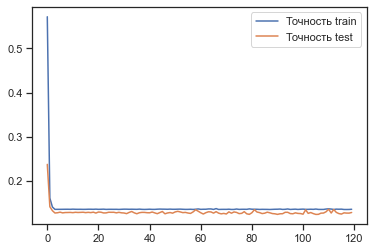

In [63]:
# модель полносвязной нейронной сети для целевого параметра y1 тренируем на нормализованных данных
modelNN_y1 = Sequential()
modelNN_y1.add(Dense(16,  input_dim=8, activation = 'sigmoid'))
modelNN_y1.add(Dense(32, activation = 'sigmoid'))
modelNN_y1.add(Dense(1, activation = 'linear'))
modelNN_y1.compile(optimizer='adam', loss='mse', metrics=['mae'])
modelNN_y1.summary()
history = modelNN_y1.fit(X_train_norm,y_train_norm.iloc[:,0], 
                    epochs=120, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('MAE')
plt.legend()
plt.show()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                144       
                                                                 
 dense_10 (Dense)            (None, 32)                544       
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 721
Trainable params: 721
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
23/23 - 0s - loss: 0.6198 - mae: 0.7424 - val_loss: 0.2019 - val_mae: 0.4118 - 479ms/epoch - 21ms/step
Epoch 2/200
23/23 - 0s - loss: 0.0775 - mae: 0.2260 - val_loss: 0.0350 - val_mae: 0.1430 - 38ms/epoch - 2ms/step
Epoch 3/200
23/23 - 0s - loss: 0.0308 - mae: 0.1403 - val_loss: 0.0355 - val_mae: 0.1477 - 3

Epoch 66/200
23/23 - 0s - loss: 0.0301 - mae: 0.1375 - val_loss: 0.0344 - val_mae: 0.1424 - 43ms/epoch - 2ms/step
Epoch 67/200
23/23 - 0s - loss: 0.0300 - mae: 0.1378 - val_loss: 0.0344 - val_mae: 0.1424 - 38ms/epoch - 2ms/step
Epoch 68/200
23/23 - 0s - loss: 0.0298 - mae: 0.1372 - val_loss: 0.0343 - val_mae: 0.1428 - 26ms/epoch - 1ms/step
Epoch 69/200
23/23 - 0s - loss: 0.0300 - mae: 0.1378 - val_loss: 0.0343 - val_mae: 0.1424 - 46ms/epoch - 2ms/step
Epoch 70/200
23/23 - 0s - loss: 0.0299 - mae: 0.1374 - val_loss: 0.0343 - val_mae: 0.1424 - 31ms/epoch - 1ms/step
Epoch 71/200
23/23 - 0s - loss: 0.0300 - mae: 0.1379 - val_loss: 0.0342 - val_mae: 0.1428 - 52ms/epoch - 2ms/step
Epoch 72/200
23/23 - 0s - loss: 0.0300 - mae: 0.1383 - val_loss: 0.0343 - val_mae: 0.1424 - 39ms/epoch - 2ms/step
Epoch 73/200
23/23 - 0s - loss: 0.0299 - mae: 0.1376 - val_loss: 0.0347 - val_mae: 0.1449 - 38ms/epoch - 2ms/step
Epoch 74/200
23/23 - 0s - loss: 0.0303 - mae: 0.1380 - val_loss: 0.0346 - val_mae: 0.142

Epoch 138/200
23/23 - 0s - loss: 0.0298 - mae: 0.1371 - val_loss: 0.0346 - val_mae: 0.1431 - 38ms/epoch - 2ms/step
Epoch 139/200
23/23 - 0s - loss: 0.0302 - mae: 0.1384 - val_loss: 0.0341 - val_mae: 0.1426 - 39ms/epoch - 2ms/step
Epoch 140/200
23/23 - 0s - loss: 0.0300 - mae: 0.1389 - val_loss: 0.0353 - val_mae: 0.1443 - 39ms/epoch - 2ms/step
Epoch 141/200
23/23 - 0s - loss: 0.0298 - mae: 0.1370 - val_loss: 0.0341 - val_mae: 0.1427 - 38ms/epoch - 2ms/step
Epoch 142/200
23/23 - 0s - loss: 0.0300 - mae: 0.1379 - val_loss: 0.0350 - val_mae: 0.1439 - 39ms/epoch - 2ms/step
Epoch 143/200
23/23 - 0s - loss: 0.0304 - mae: 0.1385 - val_loss: 0.0349 - val_mae: 0.1436 - 38ms/epoch - 2ms/step
Epoch 144/200
23/23 - 0s - loss: 0.0297 - mae: 0.1370 - val_loss: 0.0342 - val_mae: 0.1427 - 38ms/epoch - 2ms/step
Epoch 145/200
23/23 - 0s - loss: 0.0301 - mae: 0.1382 - val_loss: 0.0339 - val_mae: 0.1426 - 34ms/epoch - 1ms/step
Epoch 146/200
23/23 - 0s - loss: 0.0299 - mae: 0.1381 - val_loss: 0.0339 - val_m

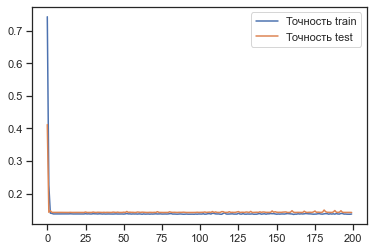

In [64]:
# модель полносвязной нейронной сети для целевого параметра y2 тренируем на нормализованных данных
modelNN_y2 = Sequential()
modelNN_y2.add(Dense(16,  input_dim=8, activation = 'sigmoid'))
modelNN_y2.add(Dense(32, activation = 'sigmoid'))
modelNN_y2.add(Dense(1, activation = 'linear'))
modelNN_y2.compile(optimizer='adam', loss='mse', metrics=['mae'])
modelNN_y2.summary()
history = modelNN_y2.fit(X_train_norm,y_train_norm.iloc[:,1], 
                    epochs=200, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('MAE')
plt.legend()
plt.show()

In [65]:
y_pred_1 = modelNN_y1.predict(X_test_norm)
y_pred_2 = modelNN_y2.predict(X_test_norm)

y_pred = np.hstack((y_pred_1,y_pred_2))
y_pred = scaler_norm_y.inverse_transform (y_pred)


MAENN_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
print (MAENN_1)
MAENN_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
print (MAENN_2)

7/7 [==============================] - 0s 832us/step
2.4564371448261446
362.63888240247445


In [66]:
# записываем данные об ошибках в итоговую таблицу
modelsMAE_y1.append(['NeuralNetwork_norm',MAENN_1])
modelsMAE_y2.append(['NeuralNetwork_norm',MAENN_2])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                144       
                                                                 
 dense_13 (Dense)            (None, 32)                544       
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 721
Trainable params: 721
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
23/23 - 0s - loss: 1.0776 - mae: 0.8346 - val_loss: 0.9209 - val_mae: 0.7664 - 484ms/epoch - 21ms/step
Epoch 2/120
23/23 - 0s - loss: 1.0227 - mae: 0.8113 - val_loss: 0.9131 - val_mae: 0.7598 - 39ms/epoch - 2ms/step
Epoch 3/120
23/23 - 0s - loss: 1.0209 - mae: 0.8114 - val_loss: 0.9302 - val_mae: 0.7739 - 3

Epoch 66/120
23/23 - 0s - loss: 1.0029 - mae: 0.8033 - val_loss: 0.8994 - val_mae: 0.7542 - 39ms/epoch - 2ms/step
Epoch 67/120
23/23 - 0s - loss: 1.0032 - mae: 0.8042 - val_loss: 0.9063 - val_mae: 0.7585 - 38ms/epoch - 2ms/step
Epoch 68/120
23/23 - 0s - loss: 1.0008 - mae: 0.8030 - val_loss: 0.9075 - val_mae: 0.7591 - 38ms/epoch - 2ms/step
Epoch 69/120
23/23 - 0s - loss: 1.0023 - mae: 0.8035 - val_loss: 0.9074 - val_mae: 0.7592 - 38ms/epoch - 2ms/step
Epoch 70/120
23/23 - 0s - loss: 1.0011 - mae: 0.8032 - val_loss: 0.9007 - val_mae: 0.7551 - 38ms/epoch - 2ms/step
Epoch 71/120
23/23 - 0s - loss: 1.0015 - mae: 0.8030 - val_loss: 0.9099 - val_mae: 0.7608 - 38ms/epoch - 2ms/step
Epoch 72/120
23/23 - 0s - loss: 1.0027 - mae: 0.8037 - val_loss: 0.9063 - val_mae: 0.7586 - 37ms/epoch - 2ms/step
Epoch 73/120
23/23 - 0s - loss: 1.0008 - mae: 0.8028 - val_loss: 0.9062 - val_mae: 0.7585 - 38ms/epoch - 2ms/step
Epoch 74/120
23/23 - 0s - loss: 1.0023 - mae: 0.8036 - val_loss: 0.9036 - val_mae: 0.756

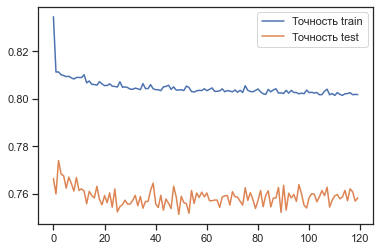

In [67]:
# модель полносвязной нейронной сети для целевого параметра y1 тренируем на стандартизованных  данных
modelNN_y1 = Sequential()
modelNN_y1.add(Dense(16,  input_dim=8, activation = 'sigmoid'))
modelNN_y1.add(Dense(32, activation = 'sigmoid'))
modelNN_y1.add(Dense(1, activation = 'linear'))
modelNN_y1.compile(optimizer='adam', loss='mse', metrics=['mae'])
modelNN_y1.summary()
history = modelNN_y1.fit(X_train_std,y_train_std.iloc[:,0], 
                    epochs=120, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('MAE')
plt.legend()
plt.show()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 16)                144       
                                                                 
 dense_16 (Dense)            (None, 32)                544       
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 721
Trainable params: 721
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
23/23 - 0s - loss: 1.1223 - mae: 0.8486 - val_loss: 1.1678 - val_mae: 0.8307 - 473ms/epoch - 21ms/step
Epoch 2/200
23/23 - 0s - loss: 1.0175 - mae: 0.8006 - val_loss: 1.1713 - val_mae: 0.8300 - 49ms/epoch - 2ms/step
Epoch 3/200
23/23 - 0s - loss: 1.0131 - mae: 0.7987 - val_loss: 1.1622 - val_mae: 0.8301 - 3

Epoch 66/200
23/23 - 0s - loss: 0.9900 - mae: 0.7917 - val_loss: 1.1297 - val_mae: 0.8263 - 38ms/epoch - 2ms/step
Epoch 67/200
23/23 - 0s - loss: 0.9901 - mae: 0.7927 - val_loss: 1.1293 - val_mae: 0.8271 - 37ms/epoch - 2ms/step
Epoch 68/200
23/23 - 0s - loss: 0.9890 - mae: 0.7911 - val_loss: 1.1299 - val_mae: 0.8262 - 40ms/epoch - 2ms/step
Epoch 69/200
23/23 - 0s - loss: 0.9892 - mae: 0.7913 - val_loss: 1.1311 - val_mae: 0.8263 - 39ms/epoch - 2ms/step
Epoch 70/200
23/23 - 0s - loss: 0.9896 - mae: 0.7917 - val_loss: 1.1302 - val_mae: 0.8271 - 38ms/epoch - 2ms/step
Epoch 71/200
23/23 - 0s - loss: 0.9894 - mae: 0.7919 - val_loss: 1.1293 - val_mae: 0.8272 - 38ms/epoch - 2ms/step
Epoch 72/200
23/23 - 0s - loss: 0.9888 - mae: 0.7915 - val_loss: 1.1314 - val_mae: 0.8263 - 37ms/epoch - 2ms/step
Epoch 73/200
23/23 - 0s - loss: 0.9908 - mae: 0.7924 - val_loss: 1.1303 - val_mae: 0.8258 - 37ms/epoch - 2ms/step
Epoch 74/200
23/23 - 0s - loss: 0.9891 - mae: 0.7914 - val_loss: 1.1301 - val_mae: 0.825

Epoch 138/200
23/23 - 0s - loss: 0.9852 - mae: 0.7904 - val_loss: 1.1308 - val_mae: 0.8274 - 44ms/epoch - 2ms/step
Epoch 139/200
23/23 - 0s - loss: 0.9863 - mae: 0.7911 - val_loss: 1.1315 - val_mae: 0.8264 - 31ms/epoch - 1ms/step
Epoch 140/200
23/23 - 0s - loss: 0.9846 - mae: 0.7901 - val_loss: 1.1305 - val_mae: 0.8275 - 51ms/epoch - 2ms/step
Epoch 141/200
23/23 - 0s - loss: 0.9863 - mae: 0.7907 - val_loss: 1.1313 - val_mae: 0.8262 - 37ms/epoch - 2ms/step
Epoch 142/200
23/23 - 0s - loss: 0.9849 - mae: 0.7898 - val_loss: 1.1305 - val_mae: 0.8271 - 34ms/epoch - 1ms/step
Epoch 143/200
23/23 - 0s - loss: 0.9857 - mae: 0.7908 - val_loss: 1.1300 - val_mae: 0.8267 - 43ms/epoch - 2ms/step
Epoch 144/200
23/23 - 0s - loss: 0.9896 - mae: 0.7919 - val_loss: 1.1311 - val_mae: 0.8268 - 34ms/epoch - 1ms/step
Epoch 145/200
23/23 - 0s - loss: 0.9906 - mae: 0.7918 - val_loss: 1.1298 - val_mae: 0.8270 - 31ms/epoch - 1ms/step
Epoch 146/200
23/23 - 0s - loss: 0.9944 - mae: 0.7947 - val_loss: 1.1345 - val_m

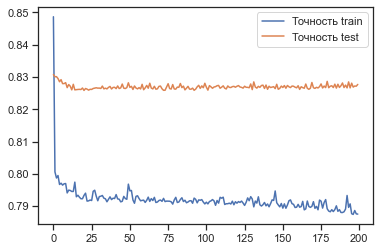

In [68]:
# модель полносвязной нейронной сети для целевого параметра y2 тренируем на стандартизованных данных
modelNN_y2 = Sequential()
modelNN_y2.add(Dense(16,  input_dim=8, activation = 'sigmoid'))
modelNN_y2.add(Dense(32, activation = 'sigmoid'))
modelNN_y2.add(Dense(1, activation = 'linear'))
modelNN_y2.compile(optimizer='adam', loss='mse', metrics=['mae'])
modelNN_y2.summary()
history = modelNN_y2.fit(X_train_std,y_train_std.iloc[:,1], 
                    epochs=200, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('MAE')
plt.legend()
plt.show()

In [69]:
y_pred_1 = modelNN_y1.predict(X_test_std)
y_pred_2 = modelNN_y2.predict(X_test_std)

y_pred = np.hstack((y_pred_1,y_pred_2))
y_pred = scaler_std_y.inverse_transform (y_pred)


MAENN_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
print (MAENN_1)
MAENN_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
print (MAENN_2)

7/7 [==============================] - 0s 0s/step
2.463312808660547
364.00838167535085


In [70]:
MAENN_2

364.00838167535085

In [71]:
# записываем данные об ошибках в итоговую таблицу
modelsMAE_y1.append(['NeuralNetwork_std',MAENN_1])
modelsMAE_y2.append(['NeuralNetwork_std',MAENN_2])

In [72]:
# Результаты расчета ошибок моделей при предсказании целевого признака "Модуль упругости при растяжении, ГПа"
modelsMAE_y1

[['LinearRegression', 2.4622494603185077],
 ['Ridge', 2.4602077730316383],
 ['Ridge_norm', 2.4567905929899005],
 ['Ridge_std', 2.456741810424239],
 ['Lasso', 2.4578997798819544],
 ['ElasticNet', 2.457893254219039],
 ['BayesianRidge', 2.455433467969294],
 ['GradientBoostingRegressor', 2.5489038569813802],
 ['GradientBoostingRegressor_norm', 2.553974211493661],
 ['GradientBoostingRegressor_std', 2.5452162247608126],
 ['KNeighborsRegressor', 2.5845096019896485],
 ['KNeighborsRegressor_norm', 2.5425995909356165],
 ['KNeighborsRegressor_std', 2.535044546975862],
 ['DecisionTreeRegressor', 2.664696544450117],
 ['DecisionTreeRegressor_norm', 2.632245463622306],
 ['DecisionTreeRegressor_std', 2.664696544450115],
 ['RandomForestRegressor', 2.5137449535060026],
 ['RandomForestRegressor_norm', 2.4876202797335916],
 ['RandomForestRegressor_std', 2.507323170841207],
 ['AdaBoostRegressor', 2.6228194067491146],
 ['AdaBoostRegressor_norm', 2.7026977150963214],
 ['AdaBoostRegressor_std', 2.607441694412

In [73]:
# Результаты расчета ошибок моделей при предсказании целевого признака "Прочность при растяжении, МПа"
modelsMAE_y2

[['LinearRegression', 365.27570019312367],
 ['Ridge', 364.19588015577045],
 ['Ridge_norm', 363.57172163898787],
 ['Ridge_std', 363.6479218300614],
 ['Lasso', 365.26592664830457],
 ['ElasticNet', 365.24609478553845],
 ['BayesianRidge', 364.20440330189547],
 ['GradientBoostingRegressor', 374.0181278739837],
 ['GradientBoostingRegressor_norm', 375.20582314504156],
 ['GradientBoostingRegressor_std', 374.87969298460797],
 ['KNeighborsRegressor', 385.55794502372555],
 ['KNeighborsRegressor_norm', 376.9848187181684],
 ['KNeighborsRegressor_std', 369.2115755885344],
 ['DecisionTreeRegressor', 381.1380516267068],
 ['DecisionTreeRegressor_norm', 377.770158143774],
 ['DecisionTreeRegressor_std', 377.15641197086677],
 ['RandomForestRegressor', 365.2618847386081],
 ['RandomForestRegressor_norm', 368.5012483272103],
 ['RandomForestRegressor_std', 363.1016166704064],
 ['AdaBoostRegressor', 389.89831137889365],
 ['AdaBoostRegressor_norm', 391.71053292891054],
 ['AdaBoostRegressor_std', 389.01548637538

In [74]:
# Сформируем датафрэйм с результатами
a = np.array(modelsMAE_y1)
b = np.array(modelsMAE_y2)
model_errors = pd.DataFrame({'Model_name': a[:,0], 'Модуль упругости при растяжении, ГПа': a[:,1], 
                             'Прочность при растяжении, МПа': b[:,1]})
model_errors = model_errors.astype({'Модуль упругости при растяжении, ГПа': np.float16, 'Прочность при растяжении, МПа': np.float16})
model_errors


,Model_name,"Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа"
0,LinearRegression,2.462891,365.25
1,Ridge,2.460938,364.25
2,Ridge_norm,2.457031,363.50
3,Ridge_std,2.457031,363.75
4,Lasso,2.457031,365.25
5,ElasticNet,2.457031,365.25
6,BayesianRidge,2.455078,364.25
7,GradientBoostingRegressor,2.548828,374.00
8,GradientBoostingRegressor_norm,2.554688,375.25
9,GradientBoostingRegressor_std,2.544922,375.00


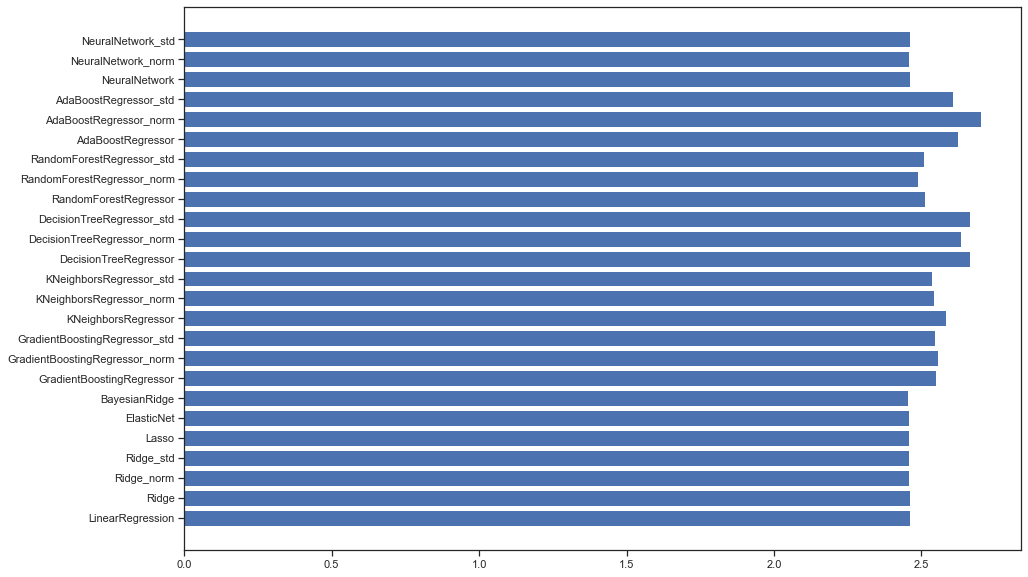

In [75]:
# Построим гистограмму 
plt.figure(figsize=(15, 10))
plt.barh(model_errors['Model_name'], model_errors['Модуль упругости при растяжении, ГПа'])
plt.show()

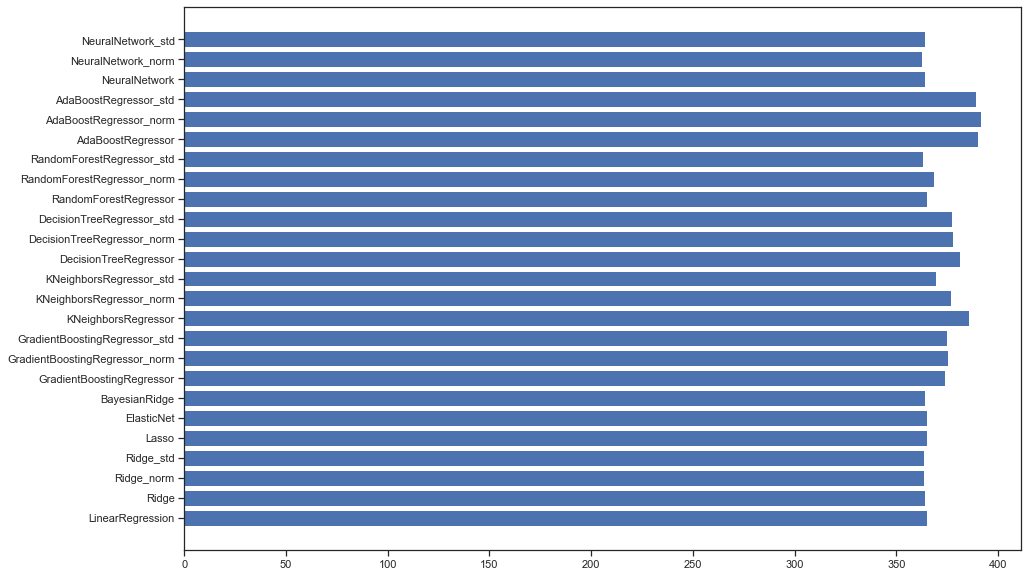

In [76]:
# Построим гистограмму 
plt.figure(figsize=(15, 10))
plt.barh(model_errors['Model_name'], model_errors['Прочность при растяжении, МПа'])
plt.show()

In [77]:
# Запишем результаты сравнения в файл
model_errors.to_excel('./Data/Model_compare_Small.xlsx')

## Выводы к разделу 3.3
1. Проведена оценка влияния снижения размерности признакового пространства. 
2. Все модели показали схожие точности с базовым вариантом
